<a href="https://colab.research.google.com/github/bargida/AI_codes/blob/main/Car_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction Model: Detailed Summary

**Objective:**

The main objective of this project is to build a robust machine learning model that can predict car prices based on various characteristics like the car's make, model, year of manufacture, mileage, and other pertinent factors. Accurate price prediction helps buyers and sellers make informed decisions, enhancing the transparency and efficiency of the car market.

**Data:**

Source: The dataset used for this project is sourced from Kaggle. It contains features such as the car’s brand, model, production year, mileage, engine type, and other relevant information.

**Steps Overview:**

* Data Preprocessing:

1. Handling Missing Data: Missing values in the dataset need to be addressed, either by removing incomplete rows or imputing missing values using suitable techniques like mean, median, or mode imputation.
2. Outlier Detection: Identifying and treating outliers is crucial, as they can skew the predictions. Outliers may be removed or adjusted depending on their impact on the model.
3. Encoding Categorical Features: Since the dataset contains categorical variables (e.g., make, model), these must be converted into a numerical format. Common techniques include one-hot encoding or label encoding, which allow machine learning algorithms to process these variables.

* Exploratory Data Analysis (EDA):

1. EDA involves visualizing and analyzing the dataset to understand feature distributions and their relationships with the target variable, i.e., car price.
2. Feature Distributions: Histograms, box plots, and bar charts can be used to visualize how individual features, such as mileage or production year, are distributed in the dataset.
3. Correlations: Scatter plots and correlation matrices are helpful in identifying relationships between numerical features and the target variable. For example, investigating how mileage impacts the price.
4. Feature Importance: Understanding which features are most influential in determining car prices is essential for creating a well-performing model.

* Modeling:

Various machine learning algorithms are employed to build the car price prediction model. The models used in this project include:

1. Linear Regression: A basic approach that assumes a linear relationship between the features and the car price.
2. Random Forest: A powerful ensemble method that creates multiple decision trees and averages their predictions to improve accuracy and reduce overfitting.
3. Gradient Boosting: Another ensemble technique that builds models sequentially, each focusing on correcting the errors of the previous ones, often resulting in highly accurate predictions.
4. Training the Models: Each model is trained on a portion of the dataset and validated using a separate portion to ensure it generalizes well to unseen data.

* Evaluation:

The models are evaluated using several performance metrics, including:
        
1. R² (Coefficient of Determination): Measures how well the model explains the variability in car prices. A higher R² indicates a better fit.
2. Mean Squared Error (MSE): This metric measures the average squared difference between predicted and actual prices. Lower MSE values indicate better predictive accuracy.
3. Model Selection: Based on the evaluation metrics, the best-performing model is selected for final deployment. In most cases, models like Random Forest or Gradient Boosting outperform simpler models like Linear Regression due to their ability to capture complex relationships in the data.

In summary, this project follows a structured approach to building a car price prediction model by focusing on data preprocessing, exploratory analysis, model training, and evaluation. Through these steps, the best-performing machine learning model is selected to provide accurate car price predictions.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from scipy.stats import boxcox

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import boxcox
from scipy.special import inv_boxcox

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

# Loading Dataset

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

df


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Basic Understanding of Data

1. Checking Dimensions of the Data

In [3]:
print(df.shape)
print(f"No of samples present in data are {df.shape[0]}")
print(f"No of features present in data are {df.shape[1]}")

(205, 26)
No of samples present in data are 205
No of features present in data are 26


2. Checking the basic information of dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**Observation**

1. From the above output we can say that there are 205 rows/records and 26 columns/Features present in our dataset.
2. From above output we can observe that 10 categorical & 16 numerical Attributes.
3. All the features are having correct data-types. So we don't have to do any changes.
4. No null values are present in data

3. Descriptive Statistics Analysis.

In [7]:
df.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [8]:
df.describe(include=['int64', 'float64']).round(2)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


4. Checking NaN values in our Dataset.

In [9]:
df.isnull().sum().to_frame().rename(columns={0: 'Total No. of Missing Values'})

,Total No. of Missing Values
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


5. Checking Duplicate Values

In [10]:
print(f"Duplicte no of rows in dataset are {(df.duplicated().sum())}")

Duplicte no of rows in dataset are 0


6. Showing Only Categorical Features.

In [11]:
df.select_dtypes(include='object').head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


7. Showing only Numeric Features

In [12]:
df.select_dtypes(include=['int64', 'float64']).head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Cleaning

1. Cleaning the CarName Feature

**Observation**

1. In the CarName Feature we can observe that the values are storing both the car's company name and the Car name.
2. So we have to clean that Feature.
3. We can separate the car company names from Carname Feature.

In [13]:
df['CompanyName'] = df['CarName'].apply(lambda x: x.split(" ")[0])

In [14]:
df.drop(columns='CarName', inplace=True)
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


2. Checking the Unique Car Company Names

In [15]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**Observation**

There seems to be some spelling error in the CompanyName column.

maxda = mazda

Nissan = nissan

porsche = porcshce

toyota = toyouta

vokswagen = volkswagen = vw

So we have to replace those incorrect car company names wit correct company's name.

In [16]:
def replace(a,b):
    df['CompanyName'].replace(a,b,inplace=True)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

In [17]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Now all the car company name seems correct.So we don't need to do any more cleaning.

Now we can go to next step which is exploratory data analysis.

# Exploratory Data Analysis (EDA)

1. Visualizing our Target Feature

Text(0.5, 1.0, 'Price spread')

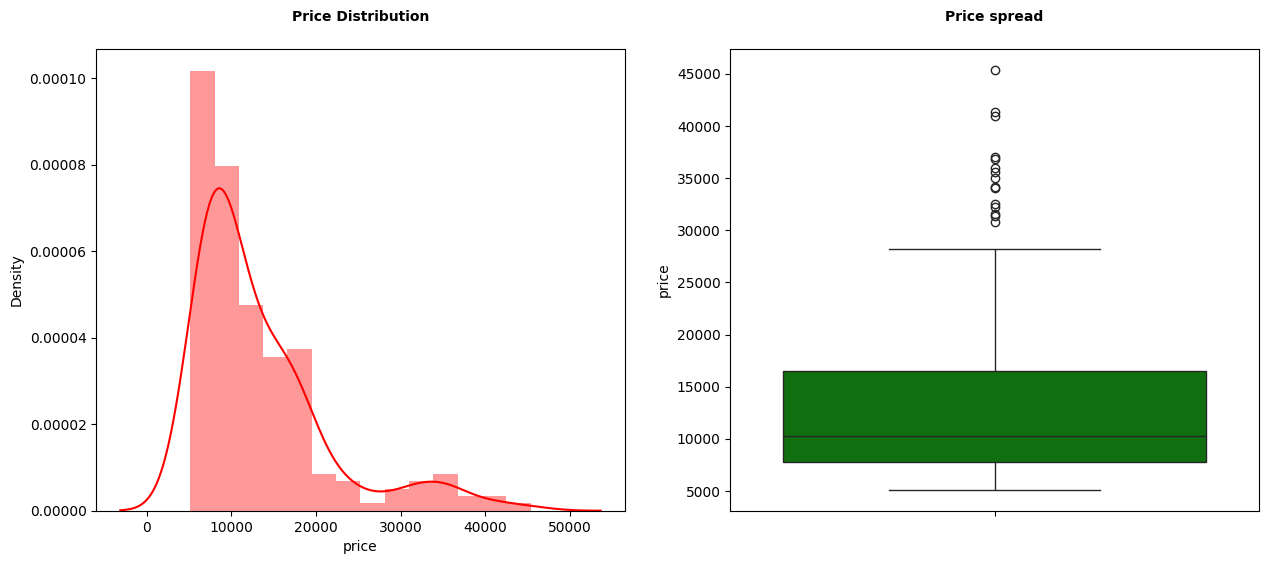

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["price"],color="red")
plt.title('Price Distribution', fontweight="black",pad=20,fontsize=10)

plt.subplot(1,2,2)
sns.boxplot(data=df, y='price', color='green')
plt.title('Price spread', fontweight="black",pad=20,fontsize=10)

In [ ]:
df["price"].agg(["min","mean","median","max","std","skew"]).to_frame().T.round(2)

,min,mean,median,max,std,skew
price,5118.0,13276.71,10295.0,45400.0,7988.85,1.78


2. Log transformation of target variable

Text(0.5, 1.0, 'Price (with log transform) spread')

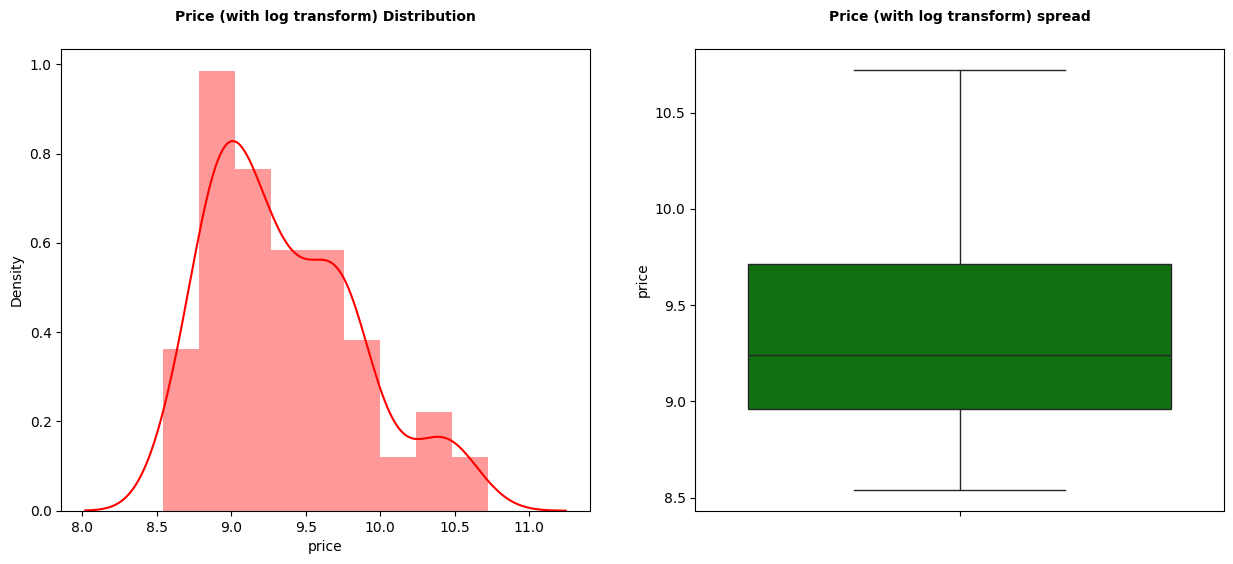

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(np.log(df["price"] + 1),color="red")
plt.title("Price (with log transform) Distribution", fontweight="black",pad=20,fontsize=10)

plt.subplot(1,2,2)
sns.boxplot(data=df, y=np.log(df["price"] + 1), color='green')
plt.title('Price (with log transform) spread', fontweight="black",pad=20,fontsize=10)

# np.log(df["price"] + 1)

In [ ]:
np.log(df["price"] + 1).agg(["min","mean","median","max","std","skew"]).to_frame().T.round(2)

,min,mean,median,max,std,skew
price,8.54,9.35,9.24,10.72,0.5,0.67


3. BoxCox transformation of target variable

Text(0.5, 1.0, 'Price (with boxcox transform) spread')

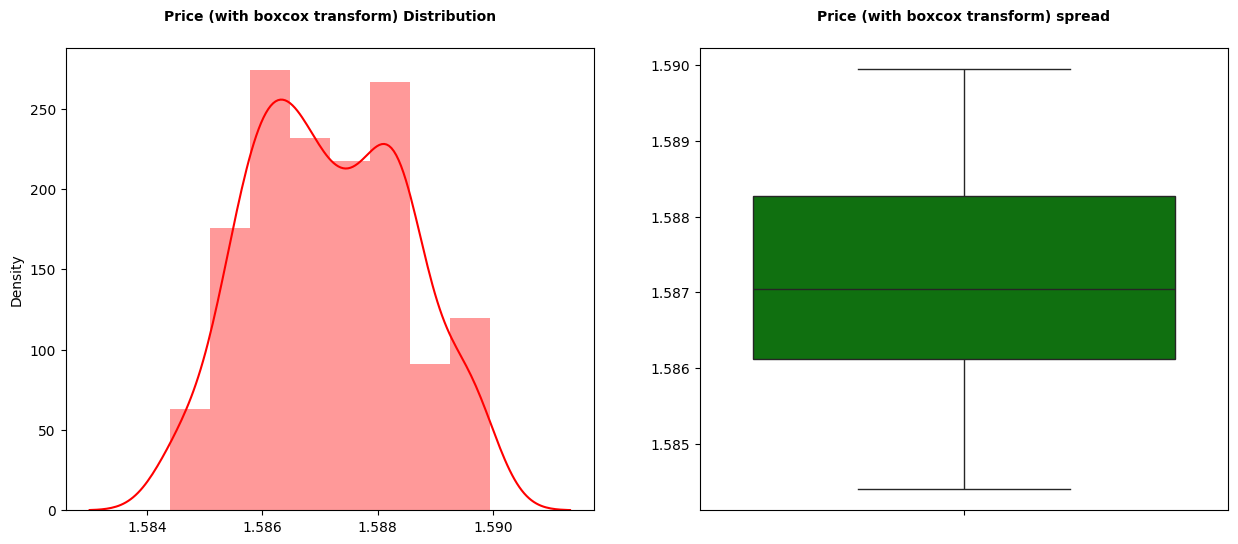

In [ ]:
df_price_boxcox, _ = boxcox(df['price']+1)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df_price_boxcox,color="red")
plt.title("Price (with boxcox transform) Distribution", fontweight="black",pad=20,fontsize=10)

plt.subplot(1,2,2)
sns.boxplot(data=df, y=df_price_boxcox, color='green')
plt.title('Price (with boxcox transform) spread', fontweight="black",pad=20,fontsize=10)

In [ ]:
from scipy.stats import skew
skew(df_price_boxcox)

0.09347893670950094

**Observation**

skewness value is lower for boxcox transformation so we should transform the target variable to lower the skewness before modeling

4. Create a list of categorical and numerical features

In [ ]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64', 'int', 'float']).columns.tolist()

5. visualizing the categorical features

In [ ]:
# create a function to visualize the categorical features

def categorical_visualization(col):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(data=df, x=col, palette="pastel", order=df[col].value_counts().index)
    plt.title(f"{col} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(data=df, x=col, y='price', palette="pastel")
    plt.title(f"{col} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,3)
    x=pd.DataFrame(df.groupby(col)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="pastel")
    plt.title(f"{col} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [ ]:
categorical_features

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'CompanyName']

6. Visualizing Car Fuel Type Feature

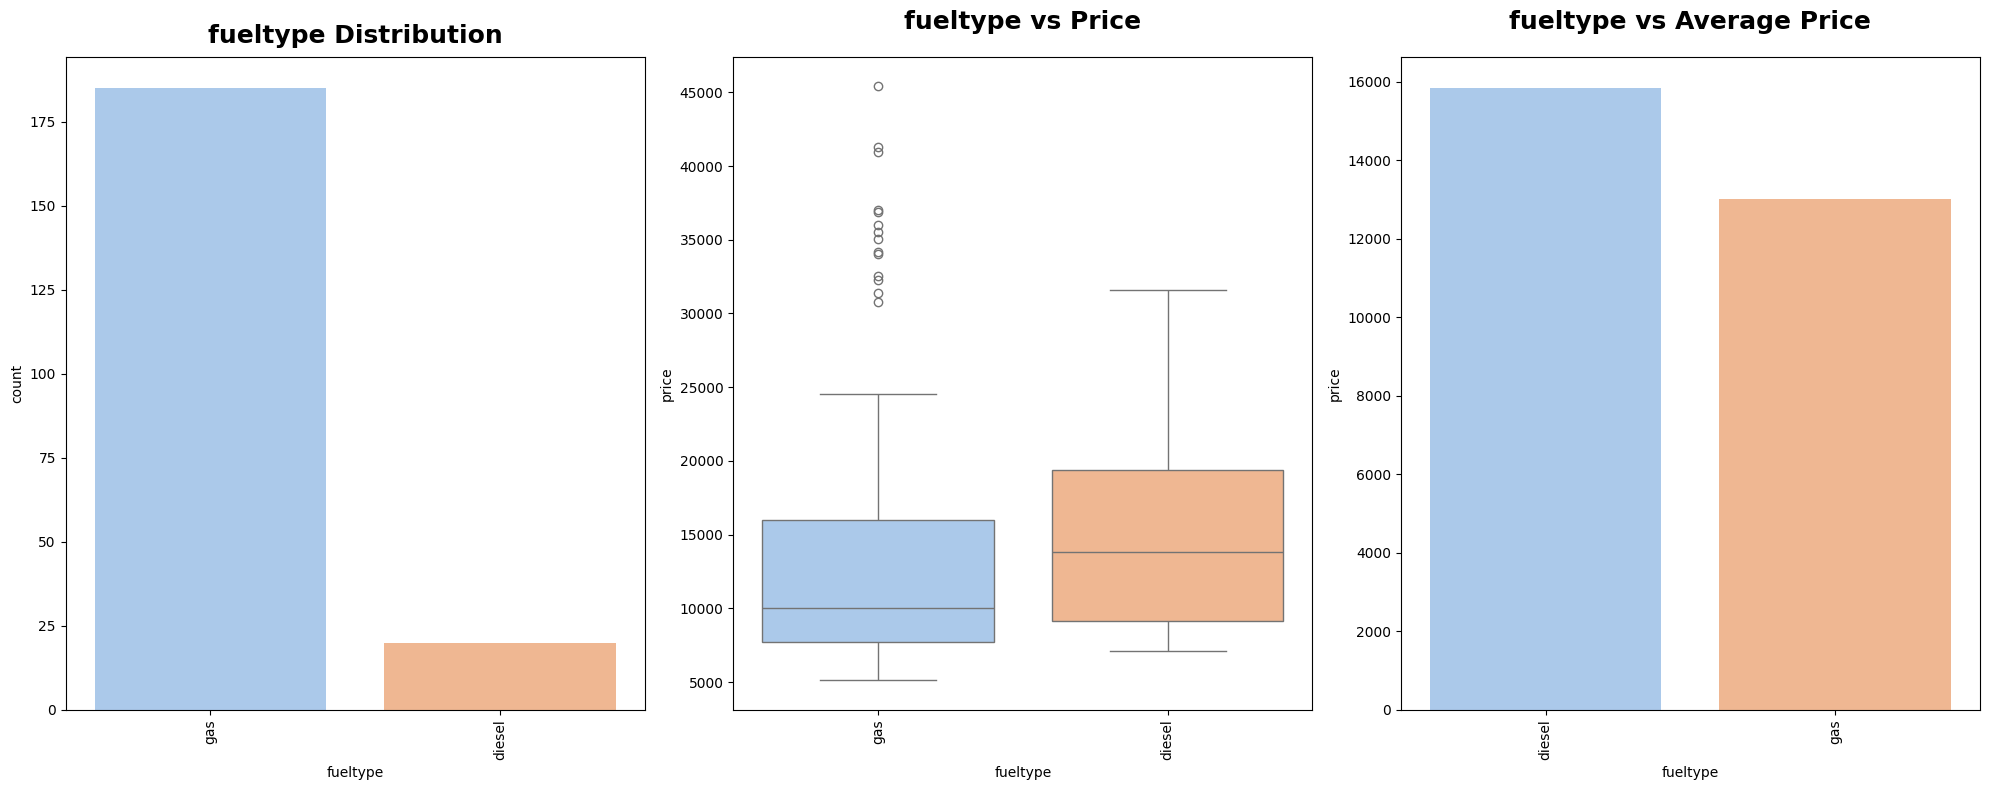

In [ ]:
categorical_visualization("fueltype")

**Insights**

* We can clearly make an inisght that Cars having gas fuel system is mostly sold.
* From the second plot we can make an insight that Gas Fuel Sysytem cars are availabe within every price range.
* Both type of fuel cars are having most of the cars price near to average price of the cars. But the gas Fuel Type cars are having cars with high prices also.
* From the third plot we can make an inisght that the Average price of gas fuel type cars are less than diesel fuel type cars.
* So we can say that customers prefer those cars which consumes less price in fuels

Lets visualise all the categorical features at once and find out the important features as per spread of price

fueltype analysis


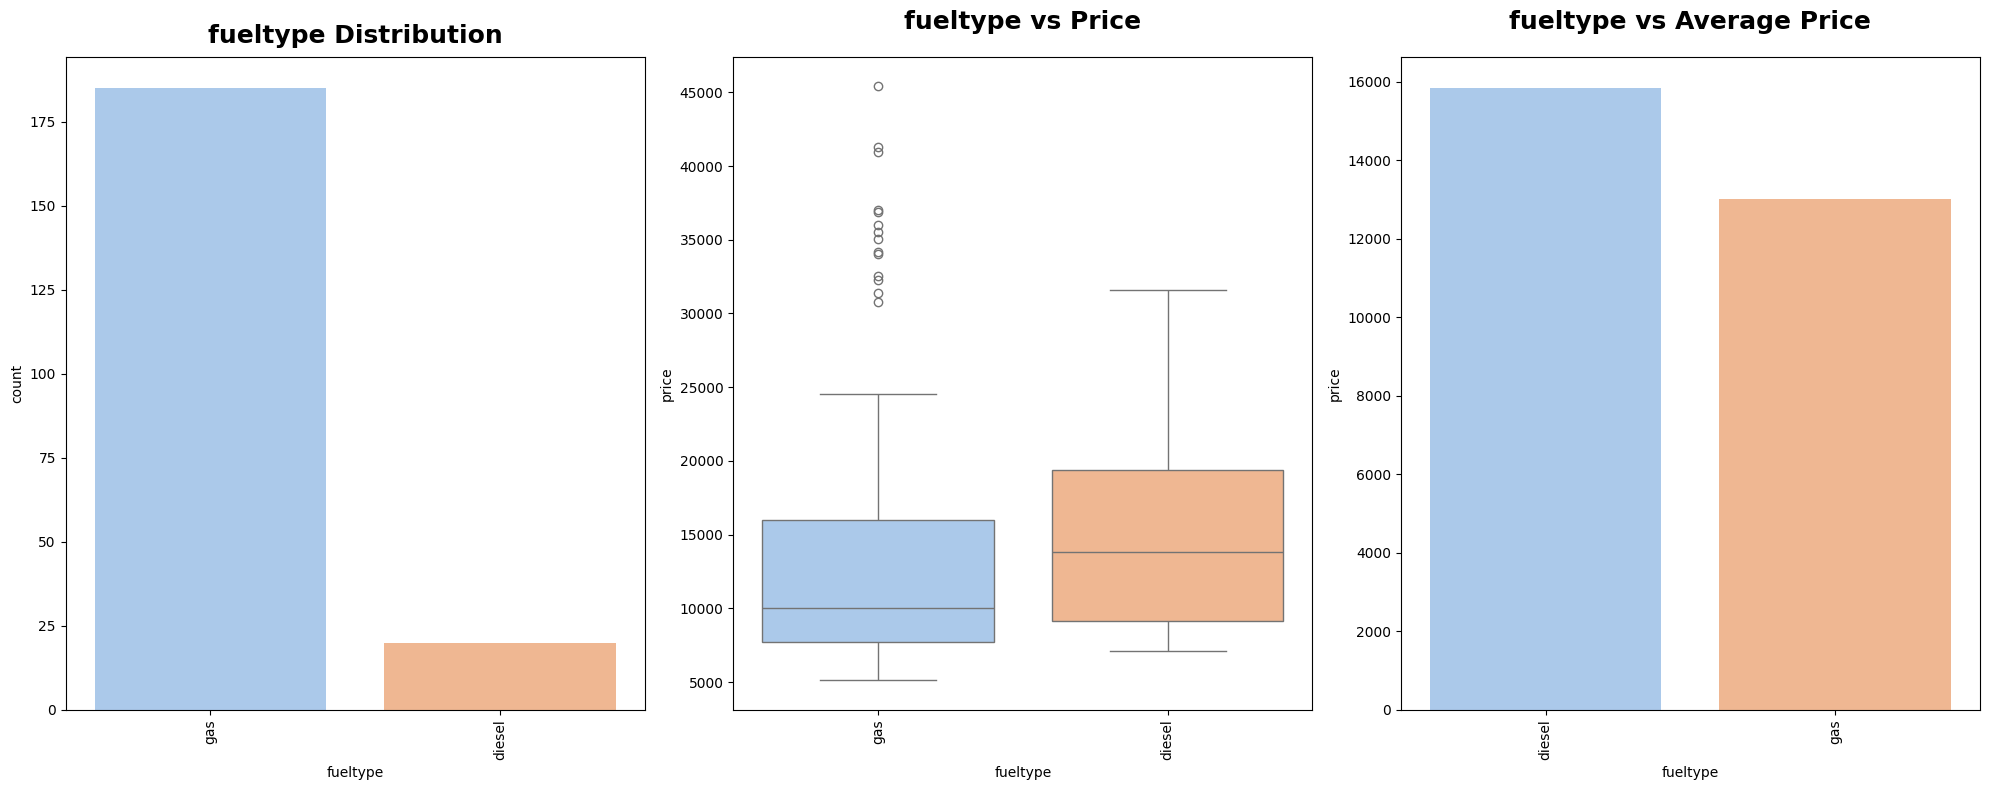

--------------------------------------------------------------------------------------------------
aspiration analysis


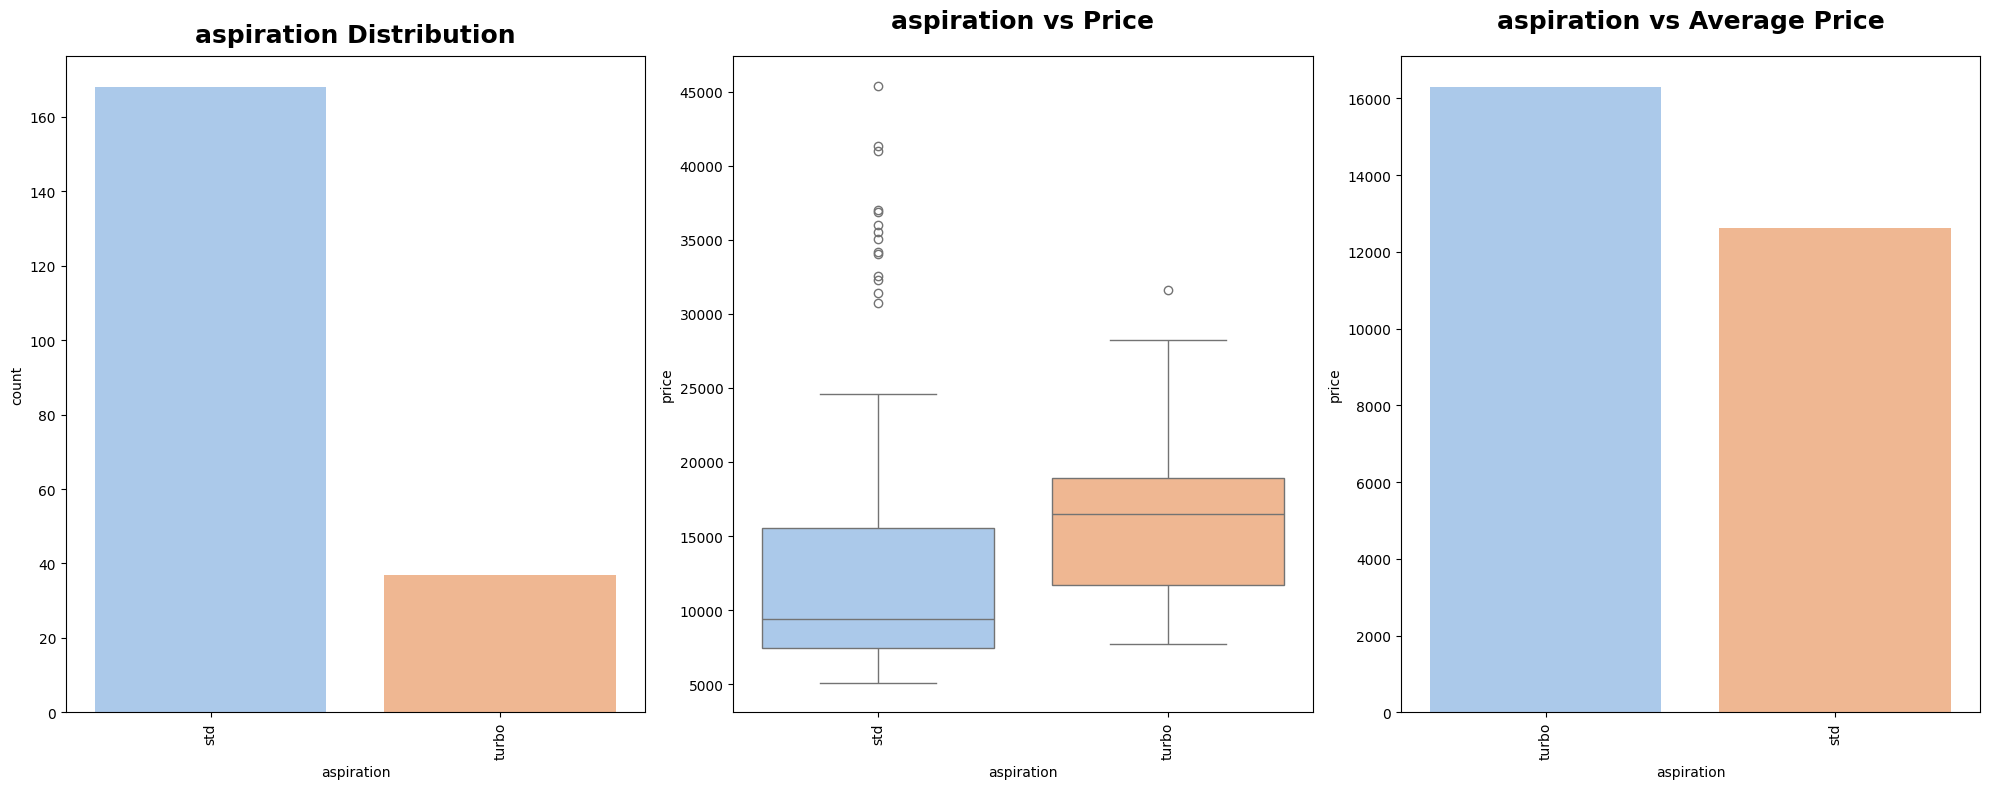

--------------------------------------------------------------------------------------------------
doornumber analysis


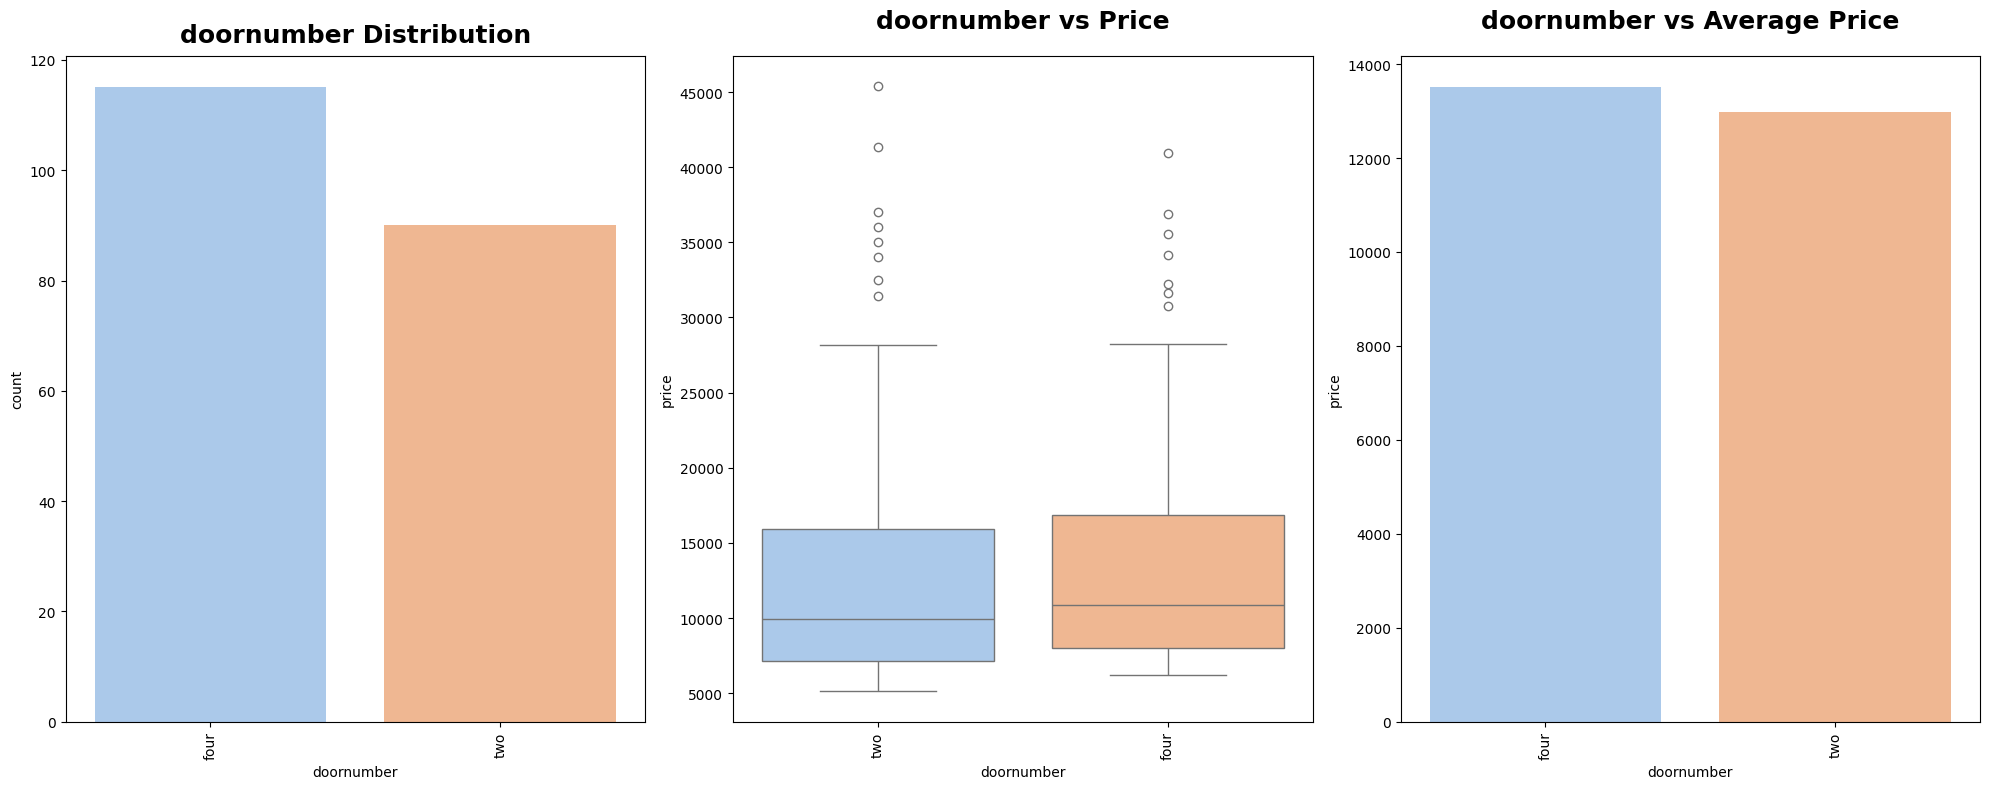

--------------------------------------------------------------------------------------------------
carbody analysis


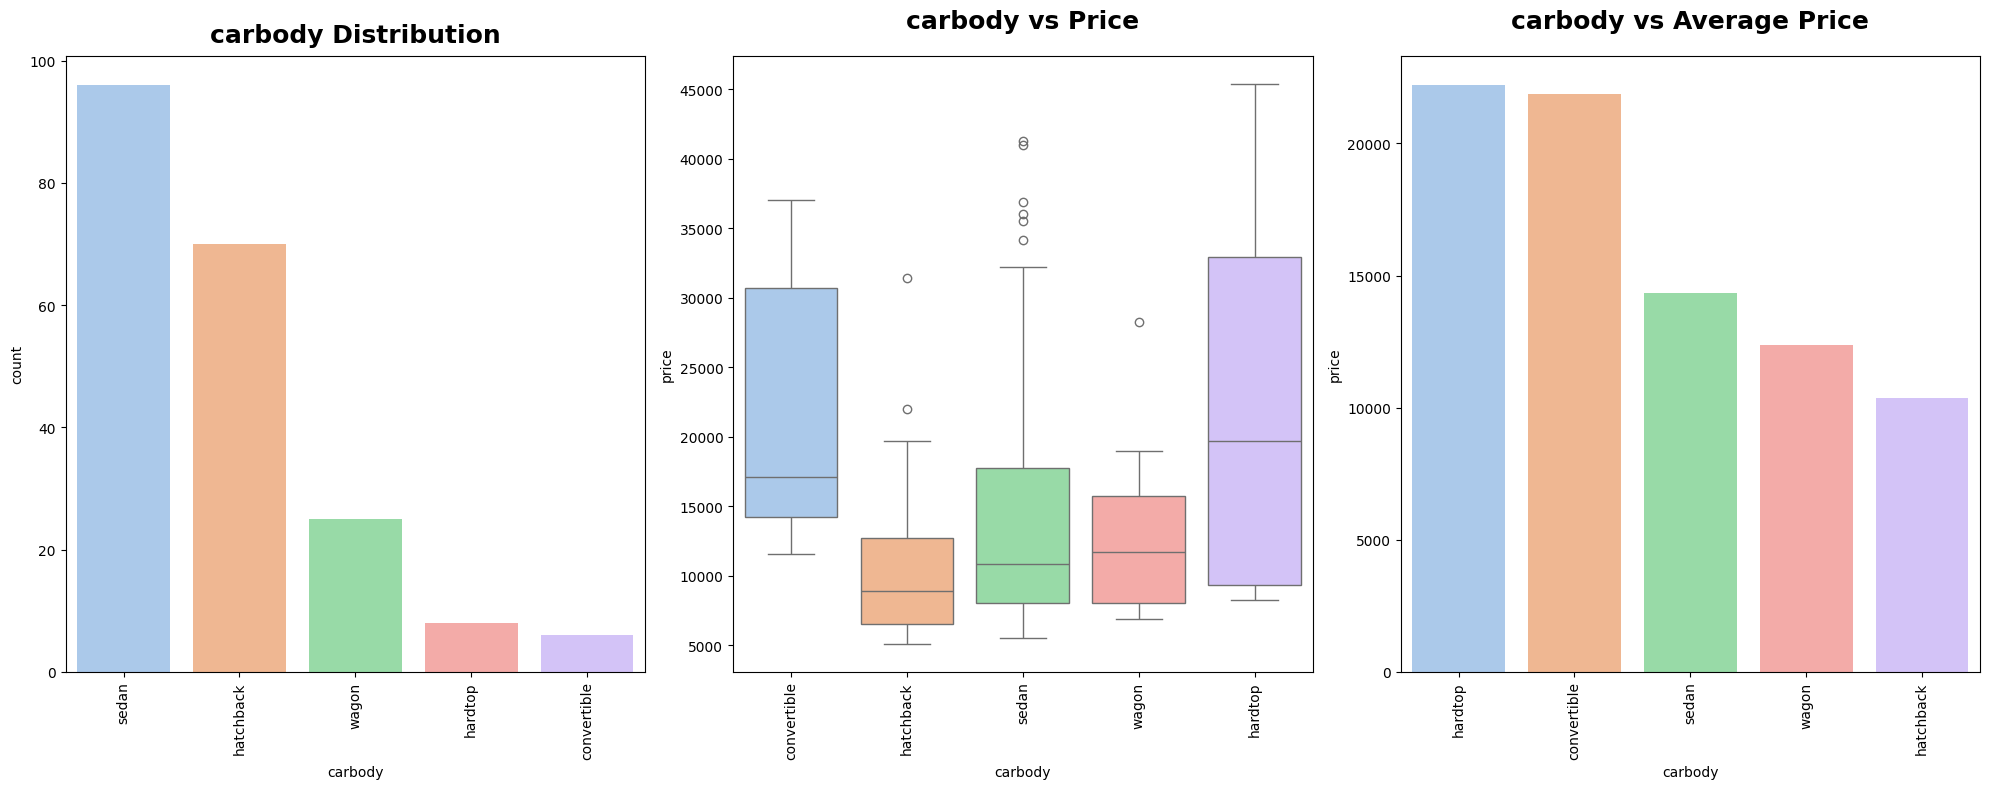

--------------------------------------------------------------------------------------------------
drivewheel analysis


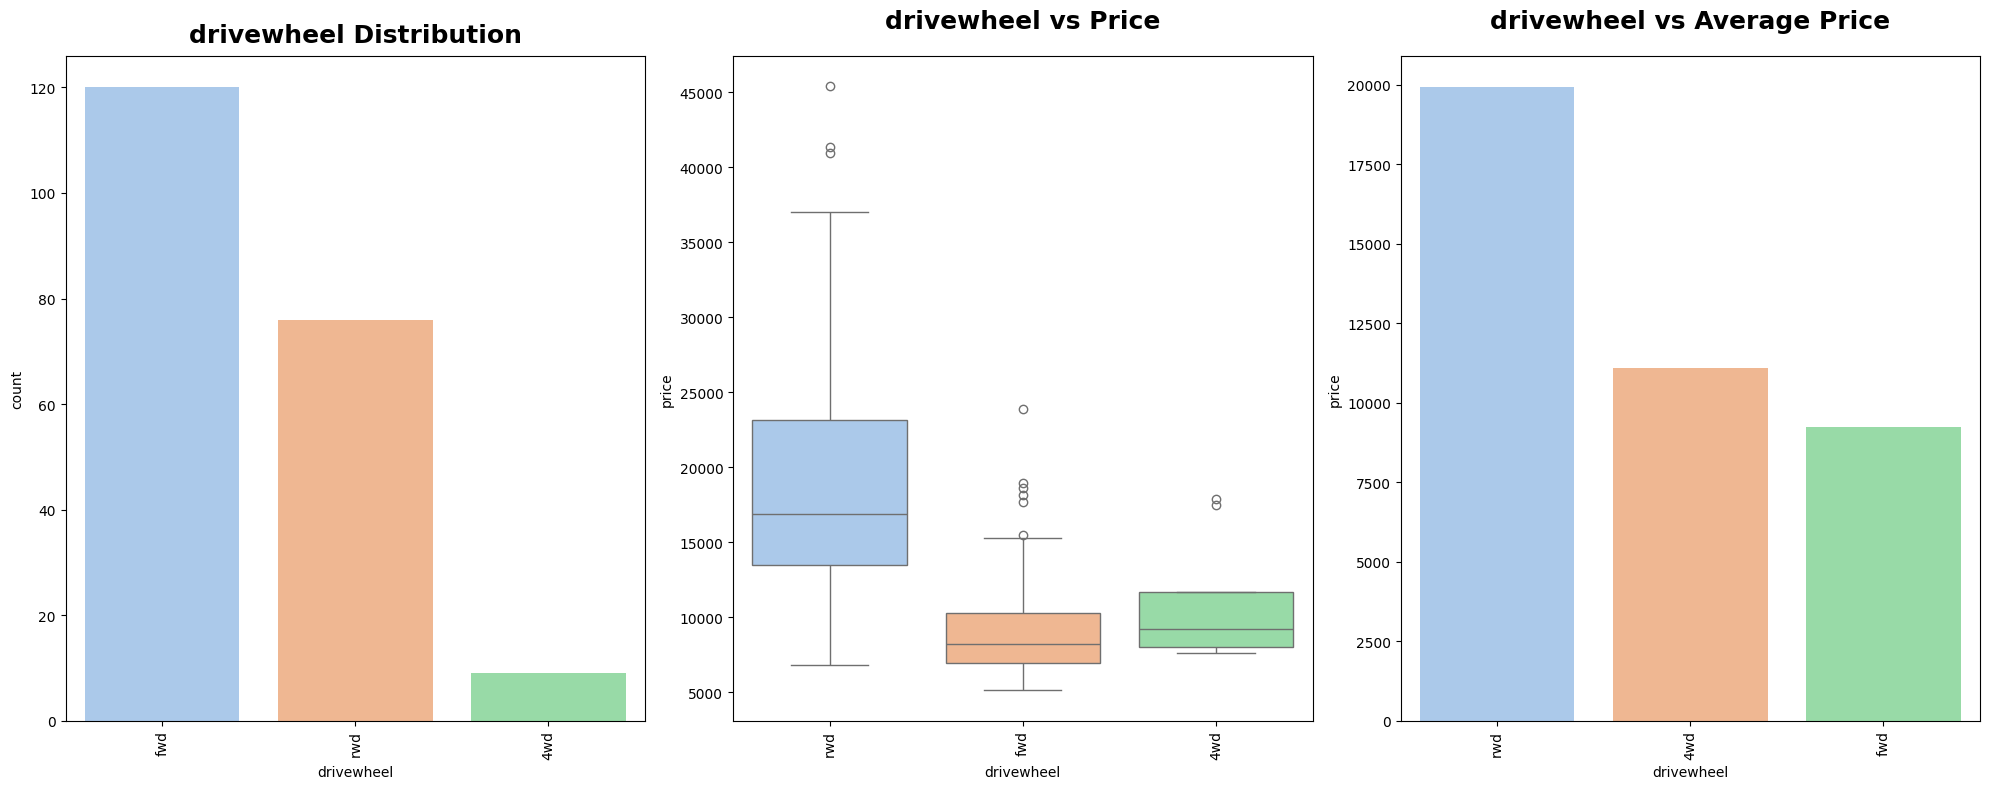

--------------------------------------------------------------------------------------------------
enginelocation analysis


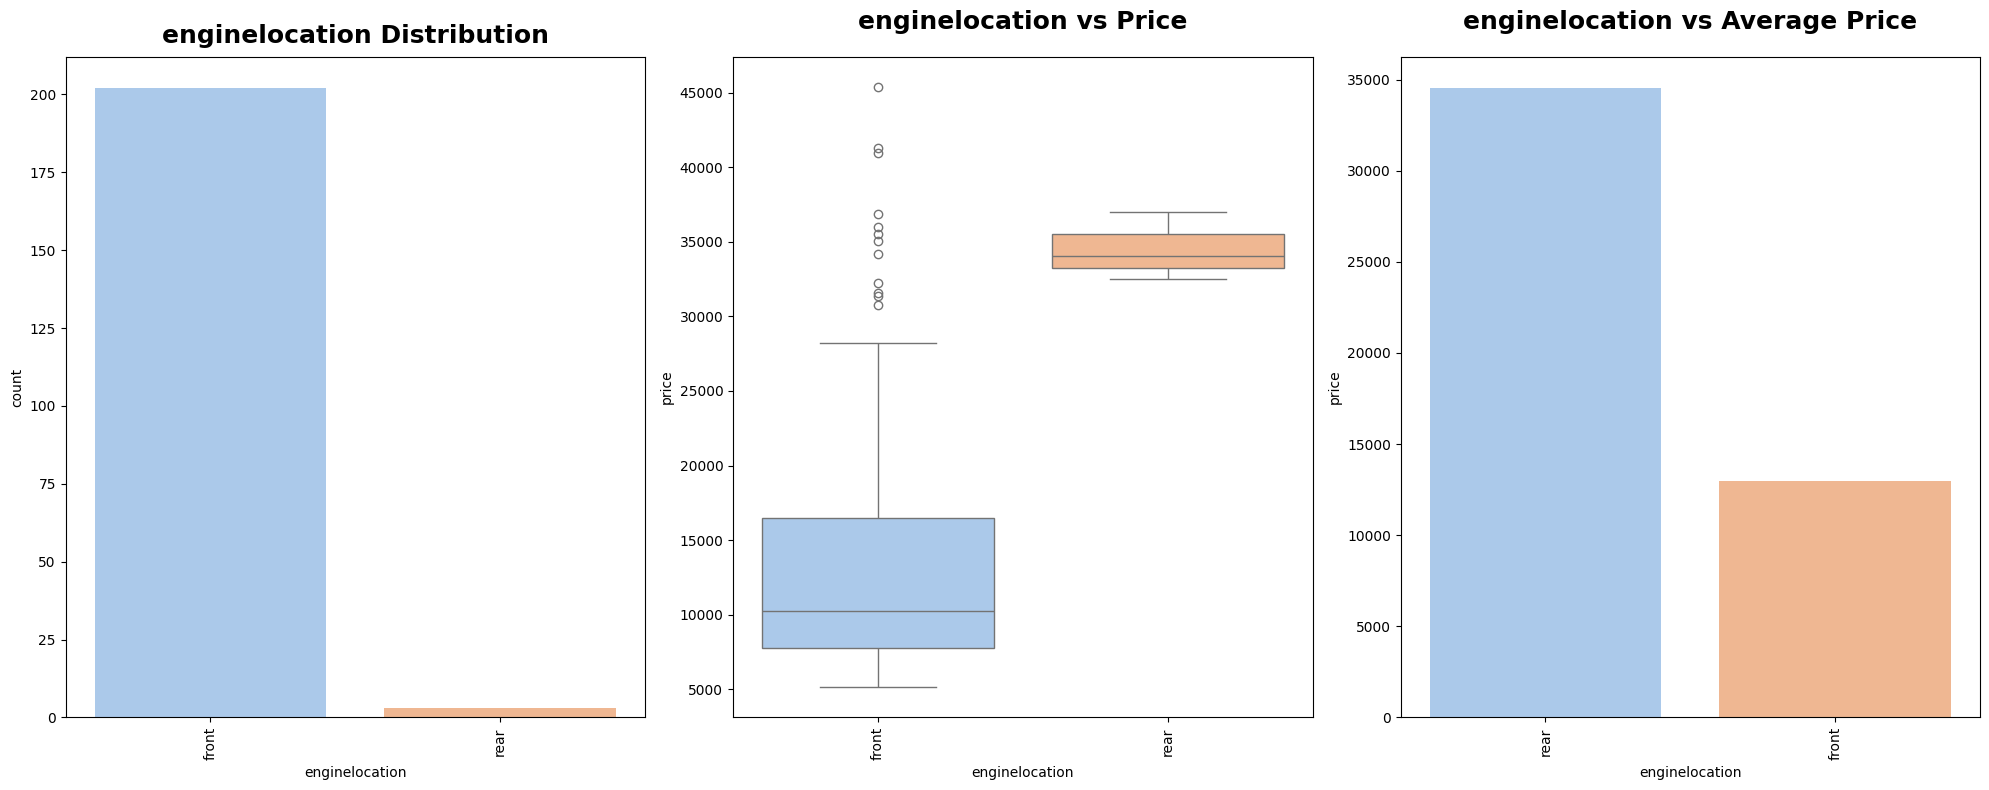

--------------------------------------------------------------------------------------------------
enginetype analysis


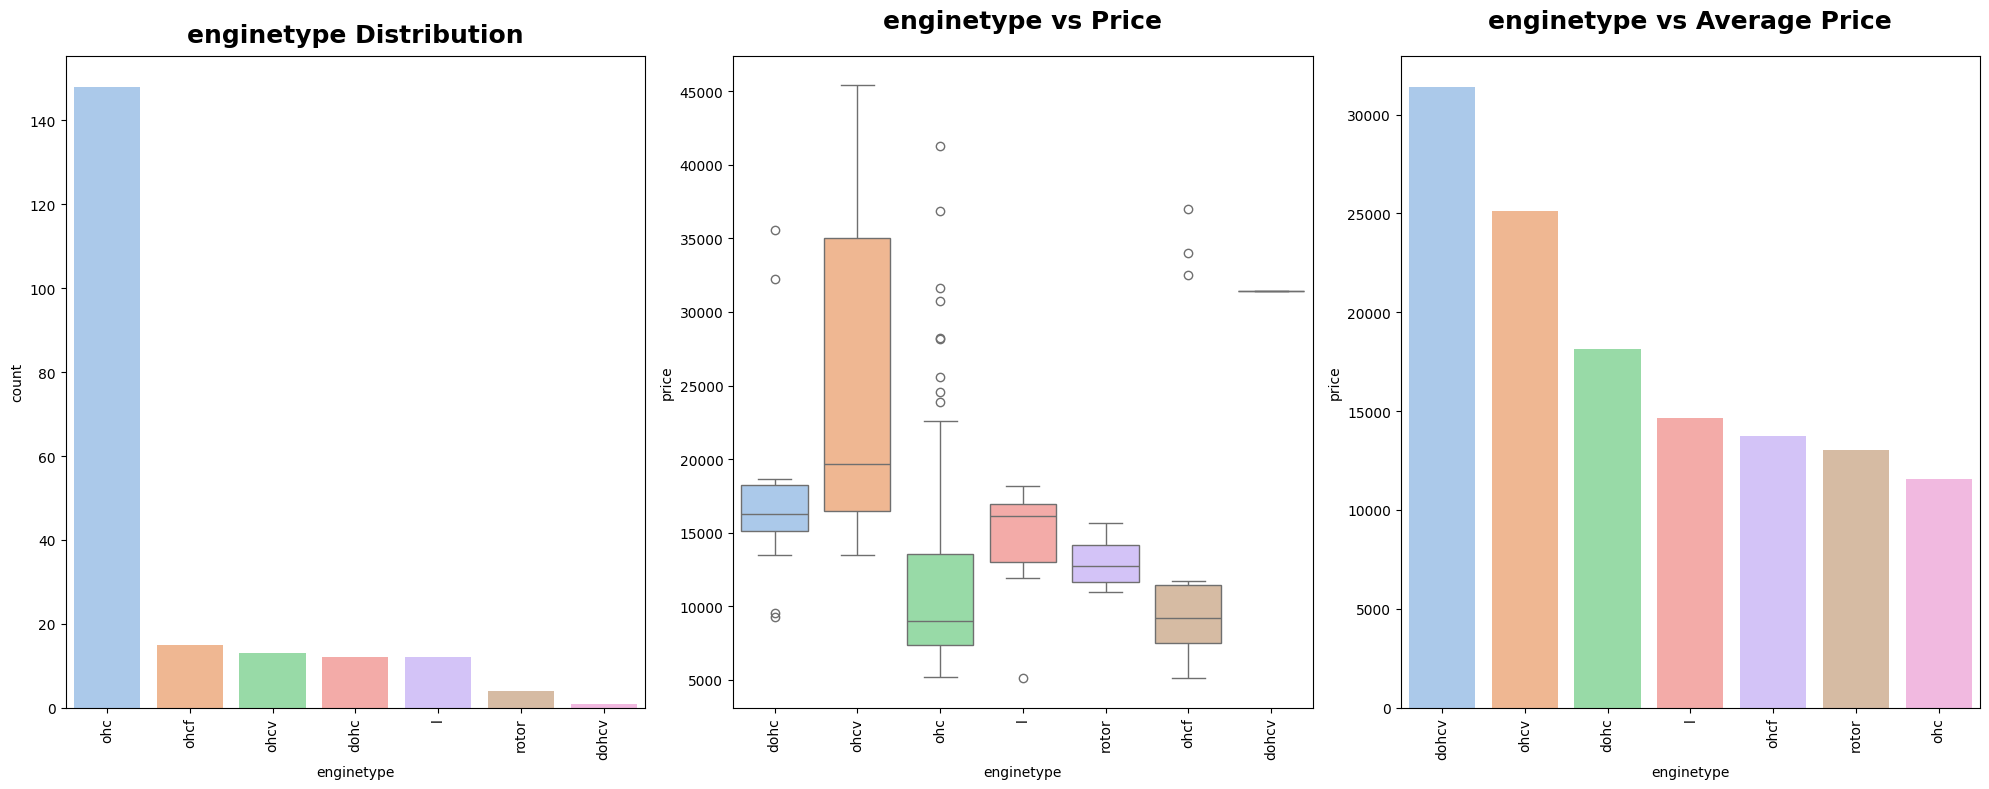

--------------------------------------------------------------------------------------------------
cylindernumber analysis


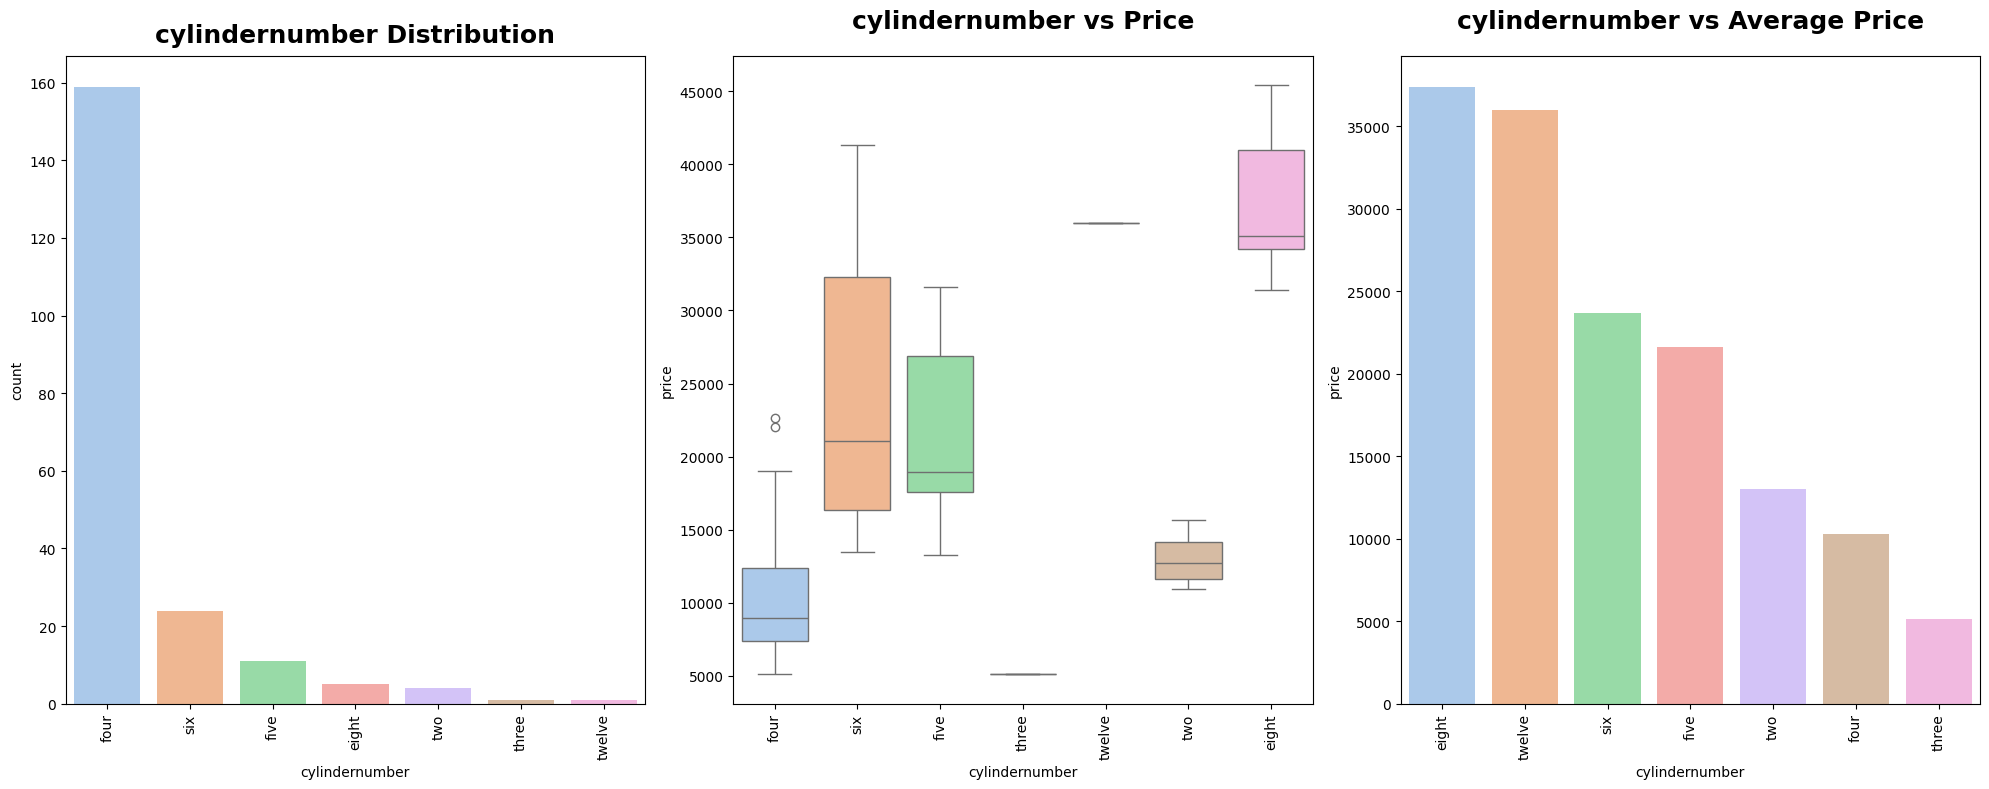

--------------------------------------------------------------------------------------------------
fuelsystem analysis


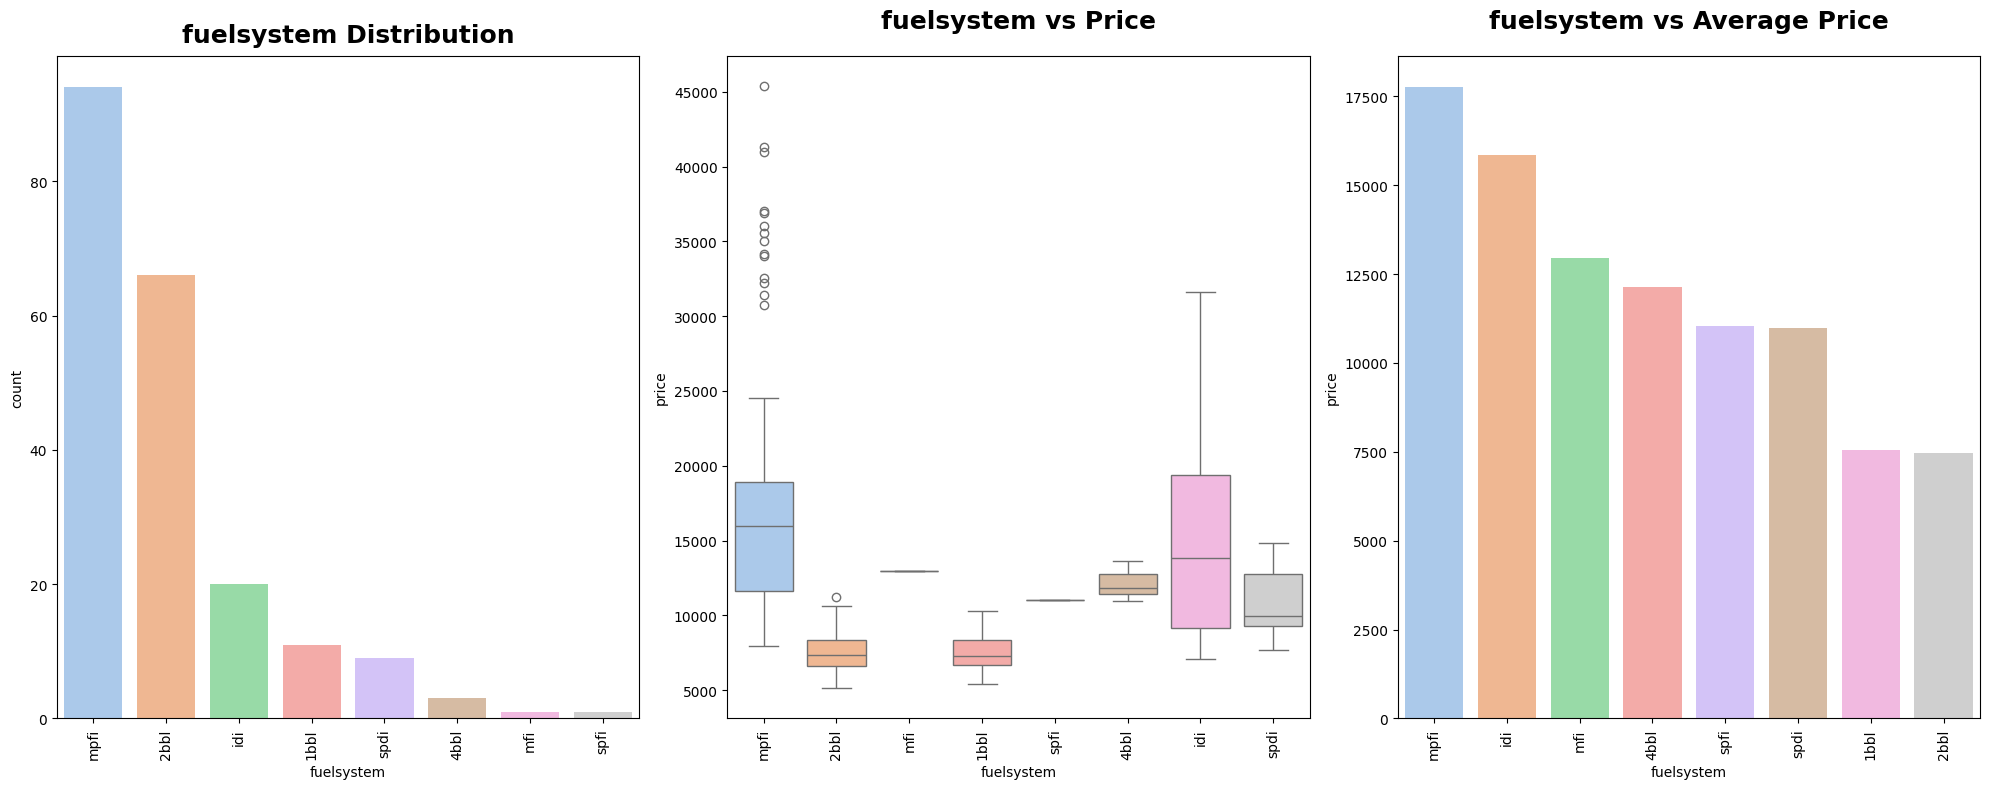

--------------------------------------------------------------------------------------------------
CompanyName analysis


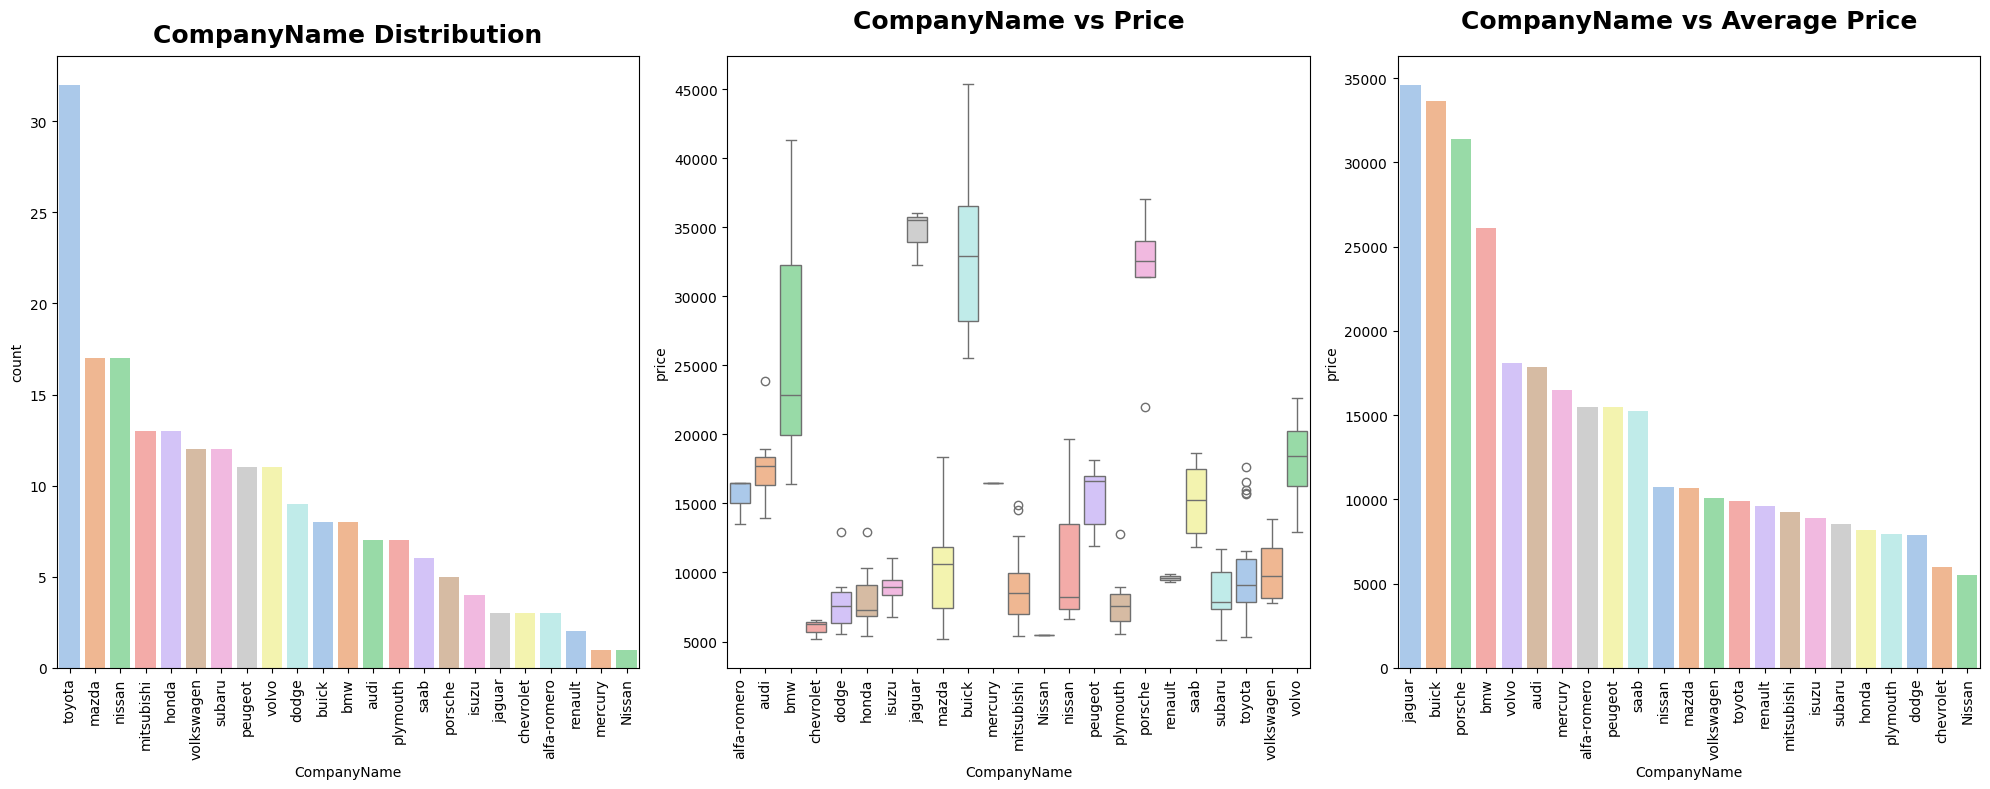

--------------------------------------------------------------------------------------------------


In [ ]:
for col in categorical_features:
    print(f"{col} analysis")
    categorical_visualization(col)
    print("--------------------------------------------------------------------------------------------------")

7. Numerical Features Visualization

In [ ]:
def regplt(cols):
    x=1
    plt.figure(figsize=(20,8))
    for col in cols:
        plt.subplot(1,3,x)
        sns.regplot(data=df, y='price', x=col, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
        plt.title(f"{col} vs Price", fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

In [ ]:
(numerical_features)

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

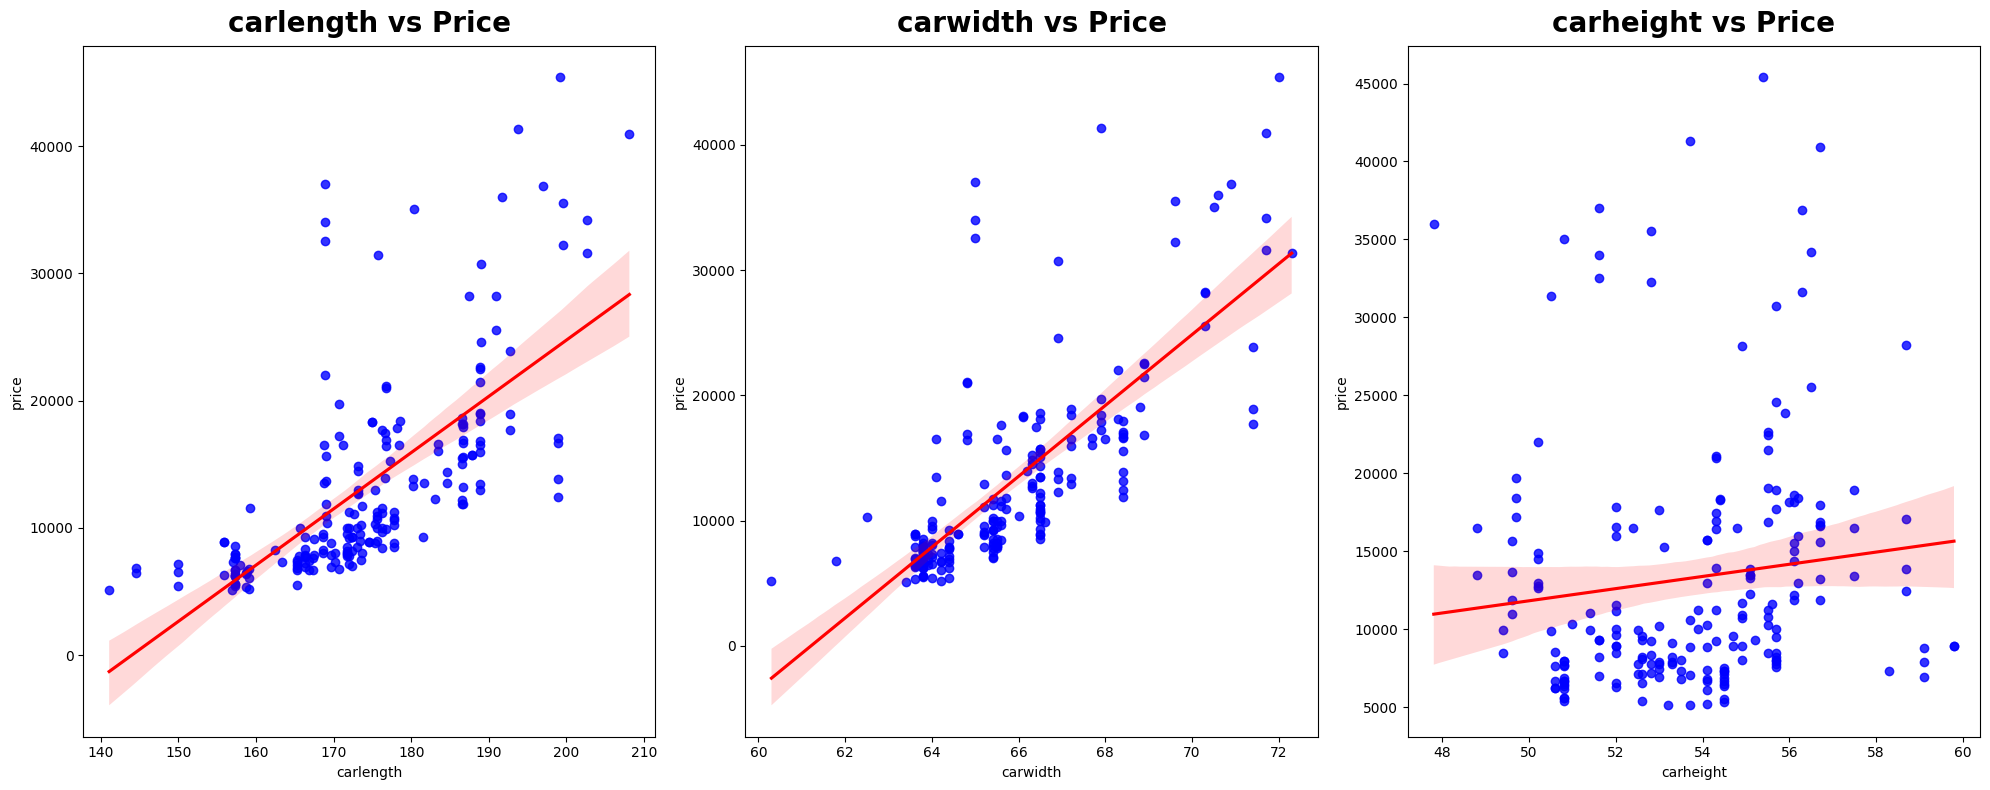

In [ ]:
regplt(['carlength', 'carwidth', 'carheight'])

**Insights**

* We can clearly observe that carlength & carwidth features are highly correlated with the price feature.
* So we can make an insight that with increment in length & width of the car there is an increment in price too.
* From carHeight vs price we can't make any inference as the data-points are too scattered.
* Since CarHeight is not affecting Price We can drop this feature.

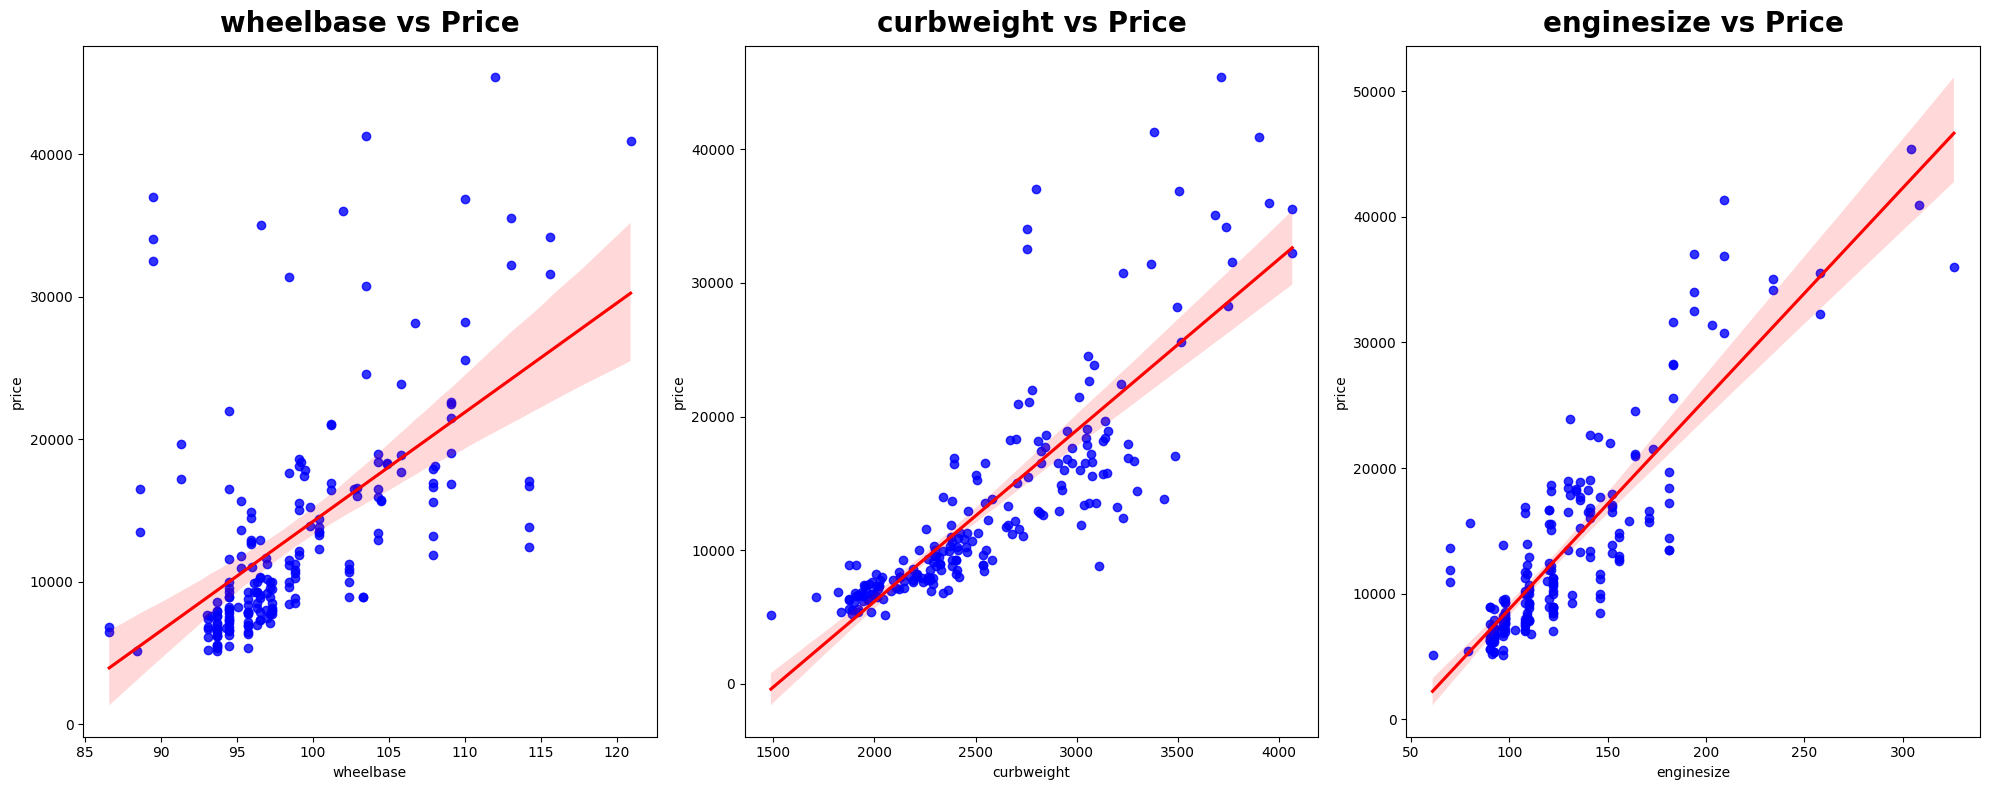

In [ ]:
regplt(['wheelbase', 'curbweight', 'enginesize'])

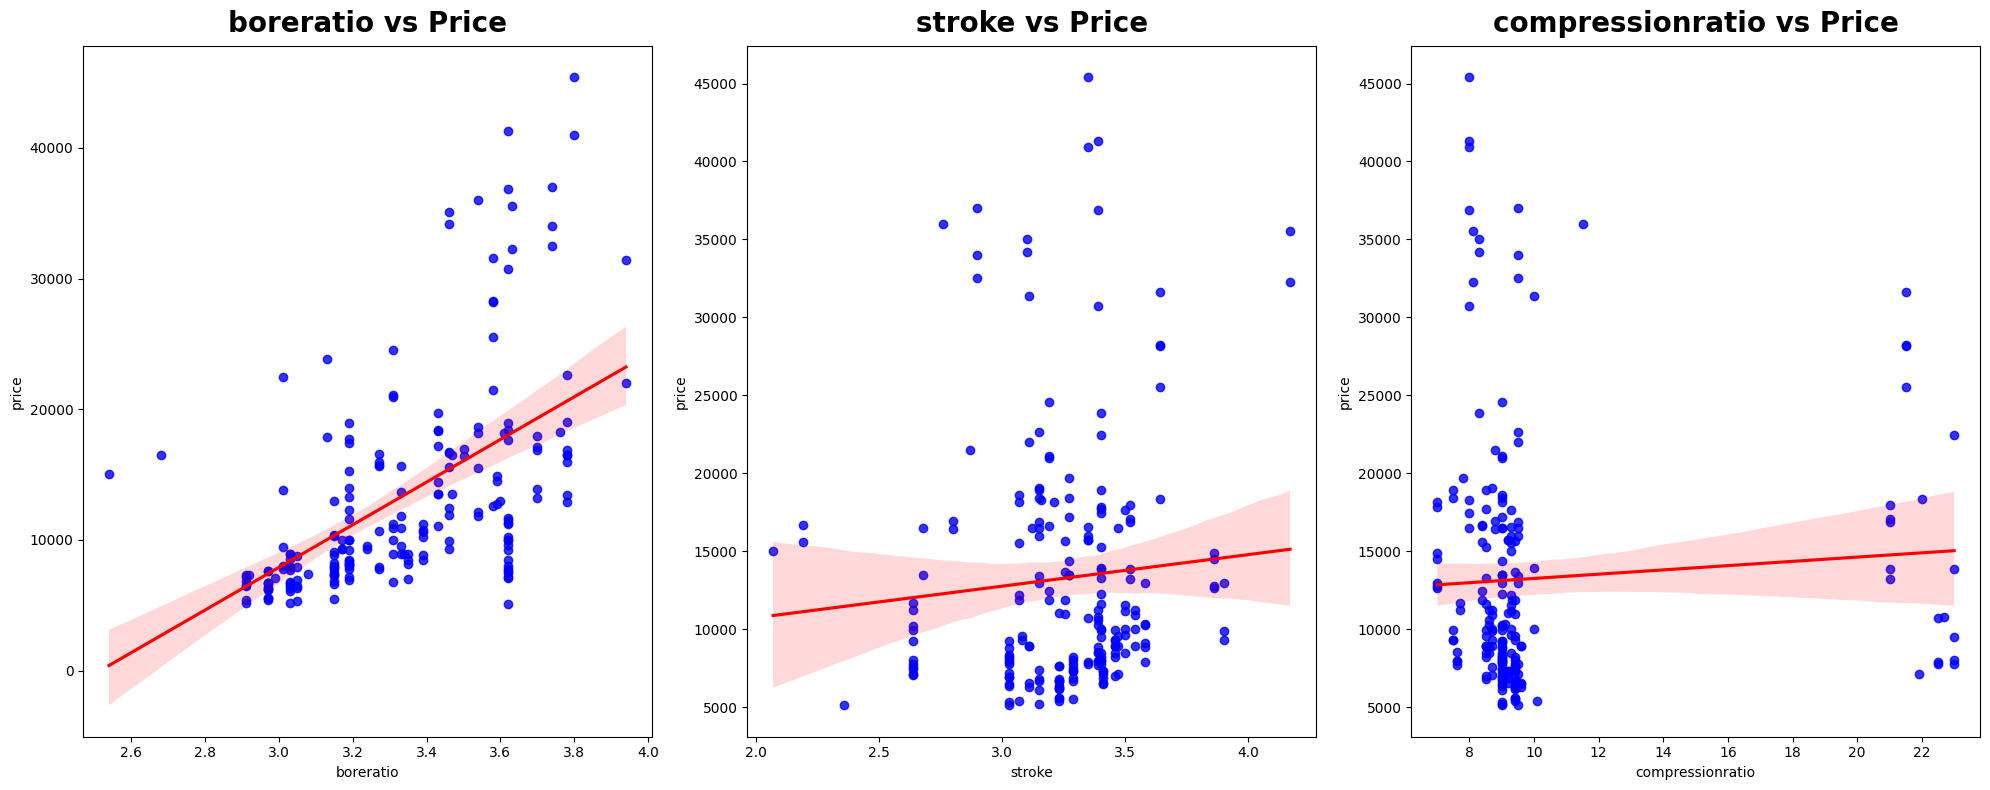

In [ ]:
regplt(['boreratio', 'stroke', 'compressionratio'])

Since Stroke and compressionratio is not affecting Price that much. We can drop this feature.

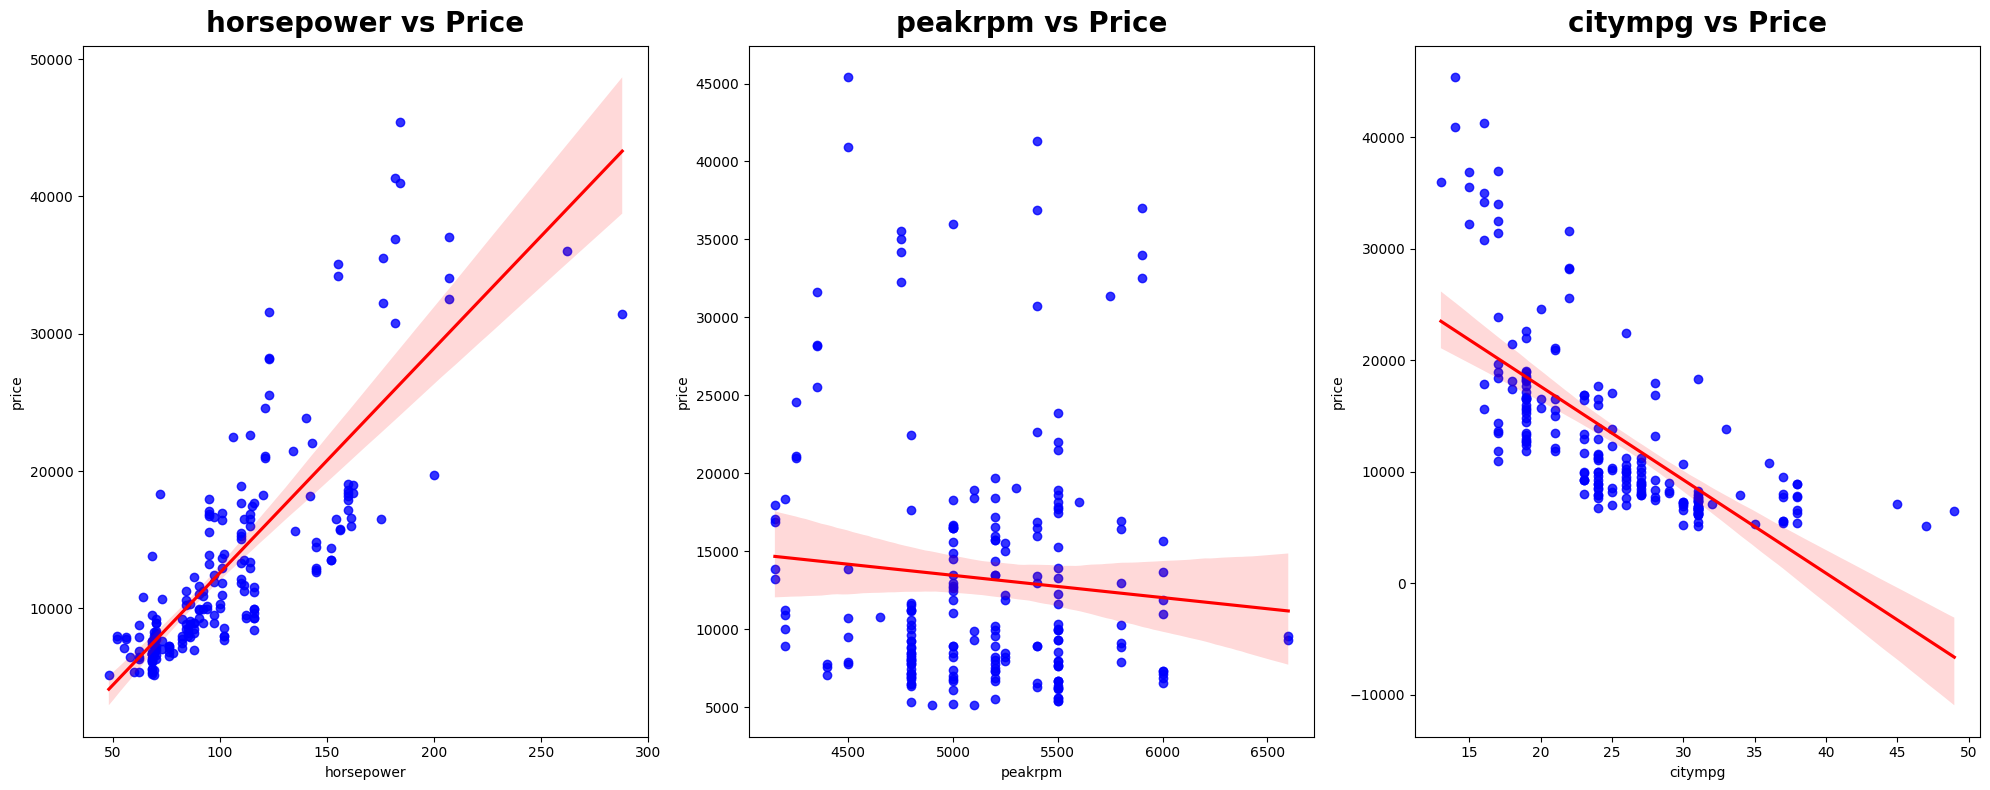

In [ ]:
regplt(['horsepower', 'peakrpm', 'citympg'])

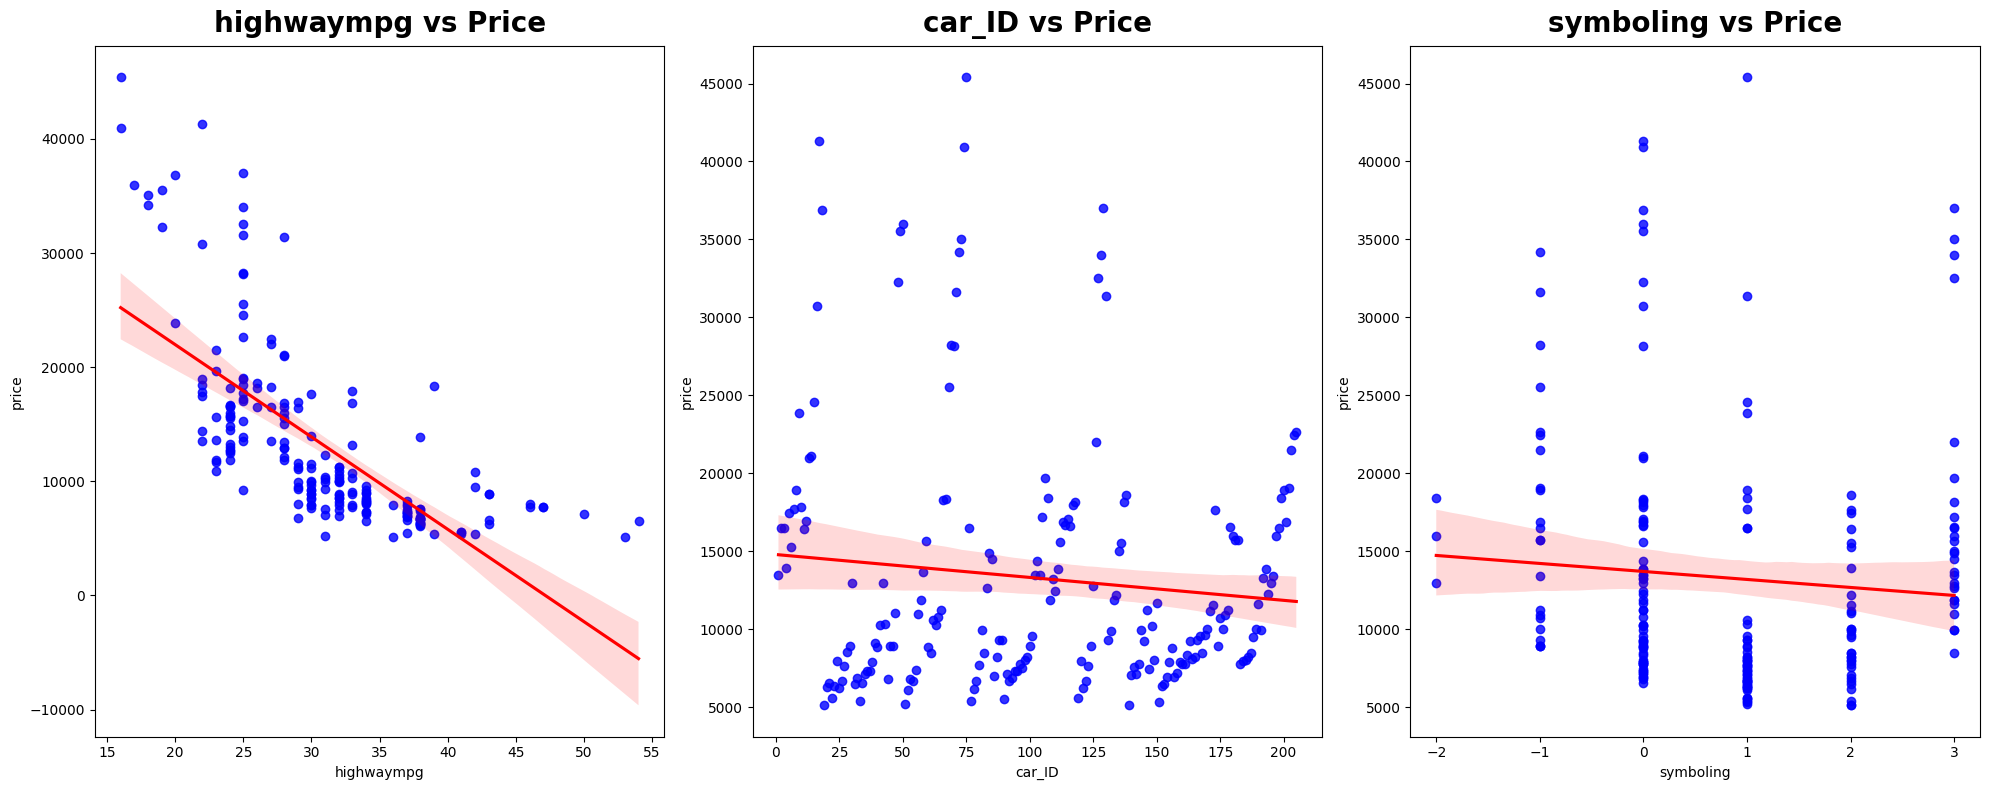

In [ ]:
regplt(['highwaympg', 'car_ID', 'symboling'])

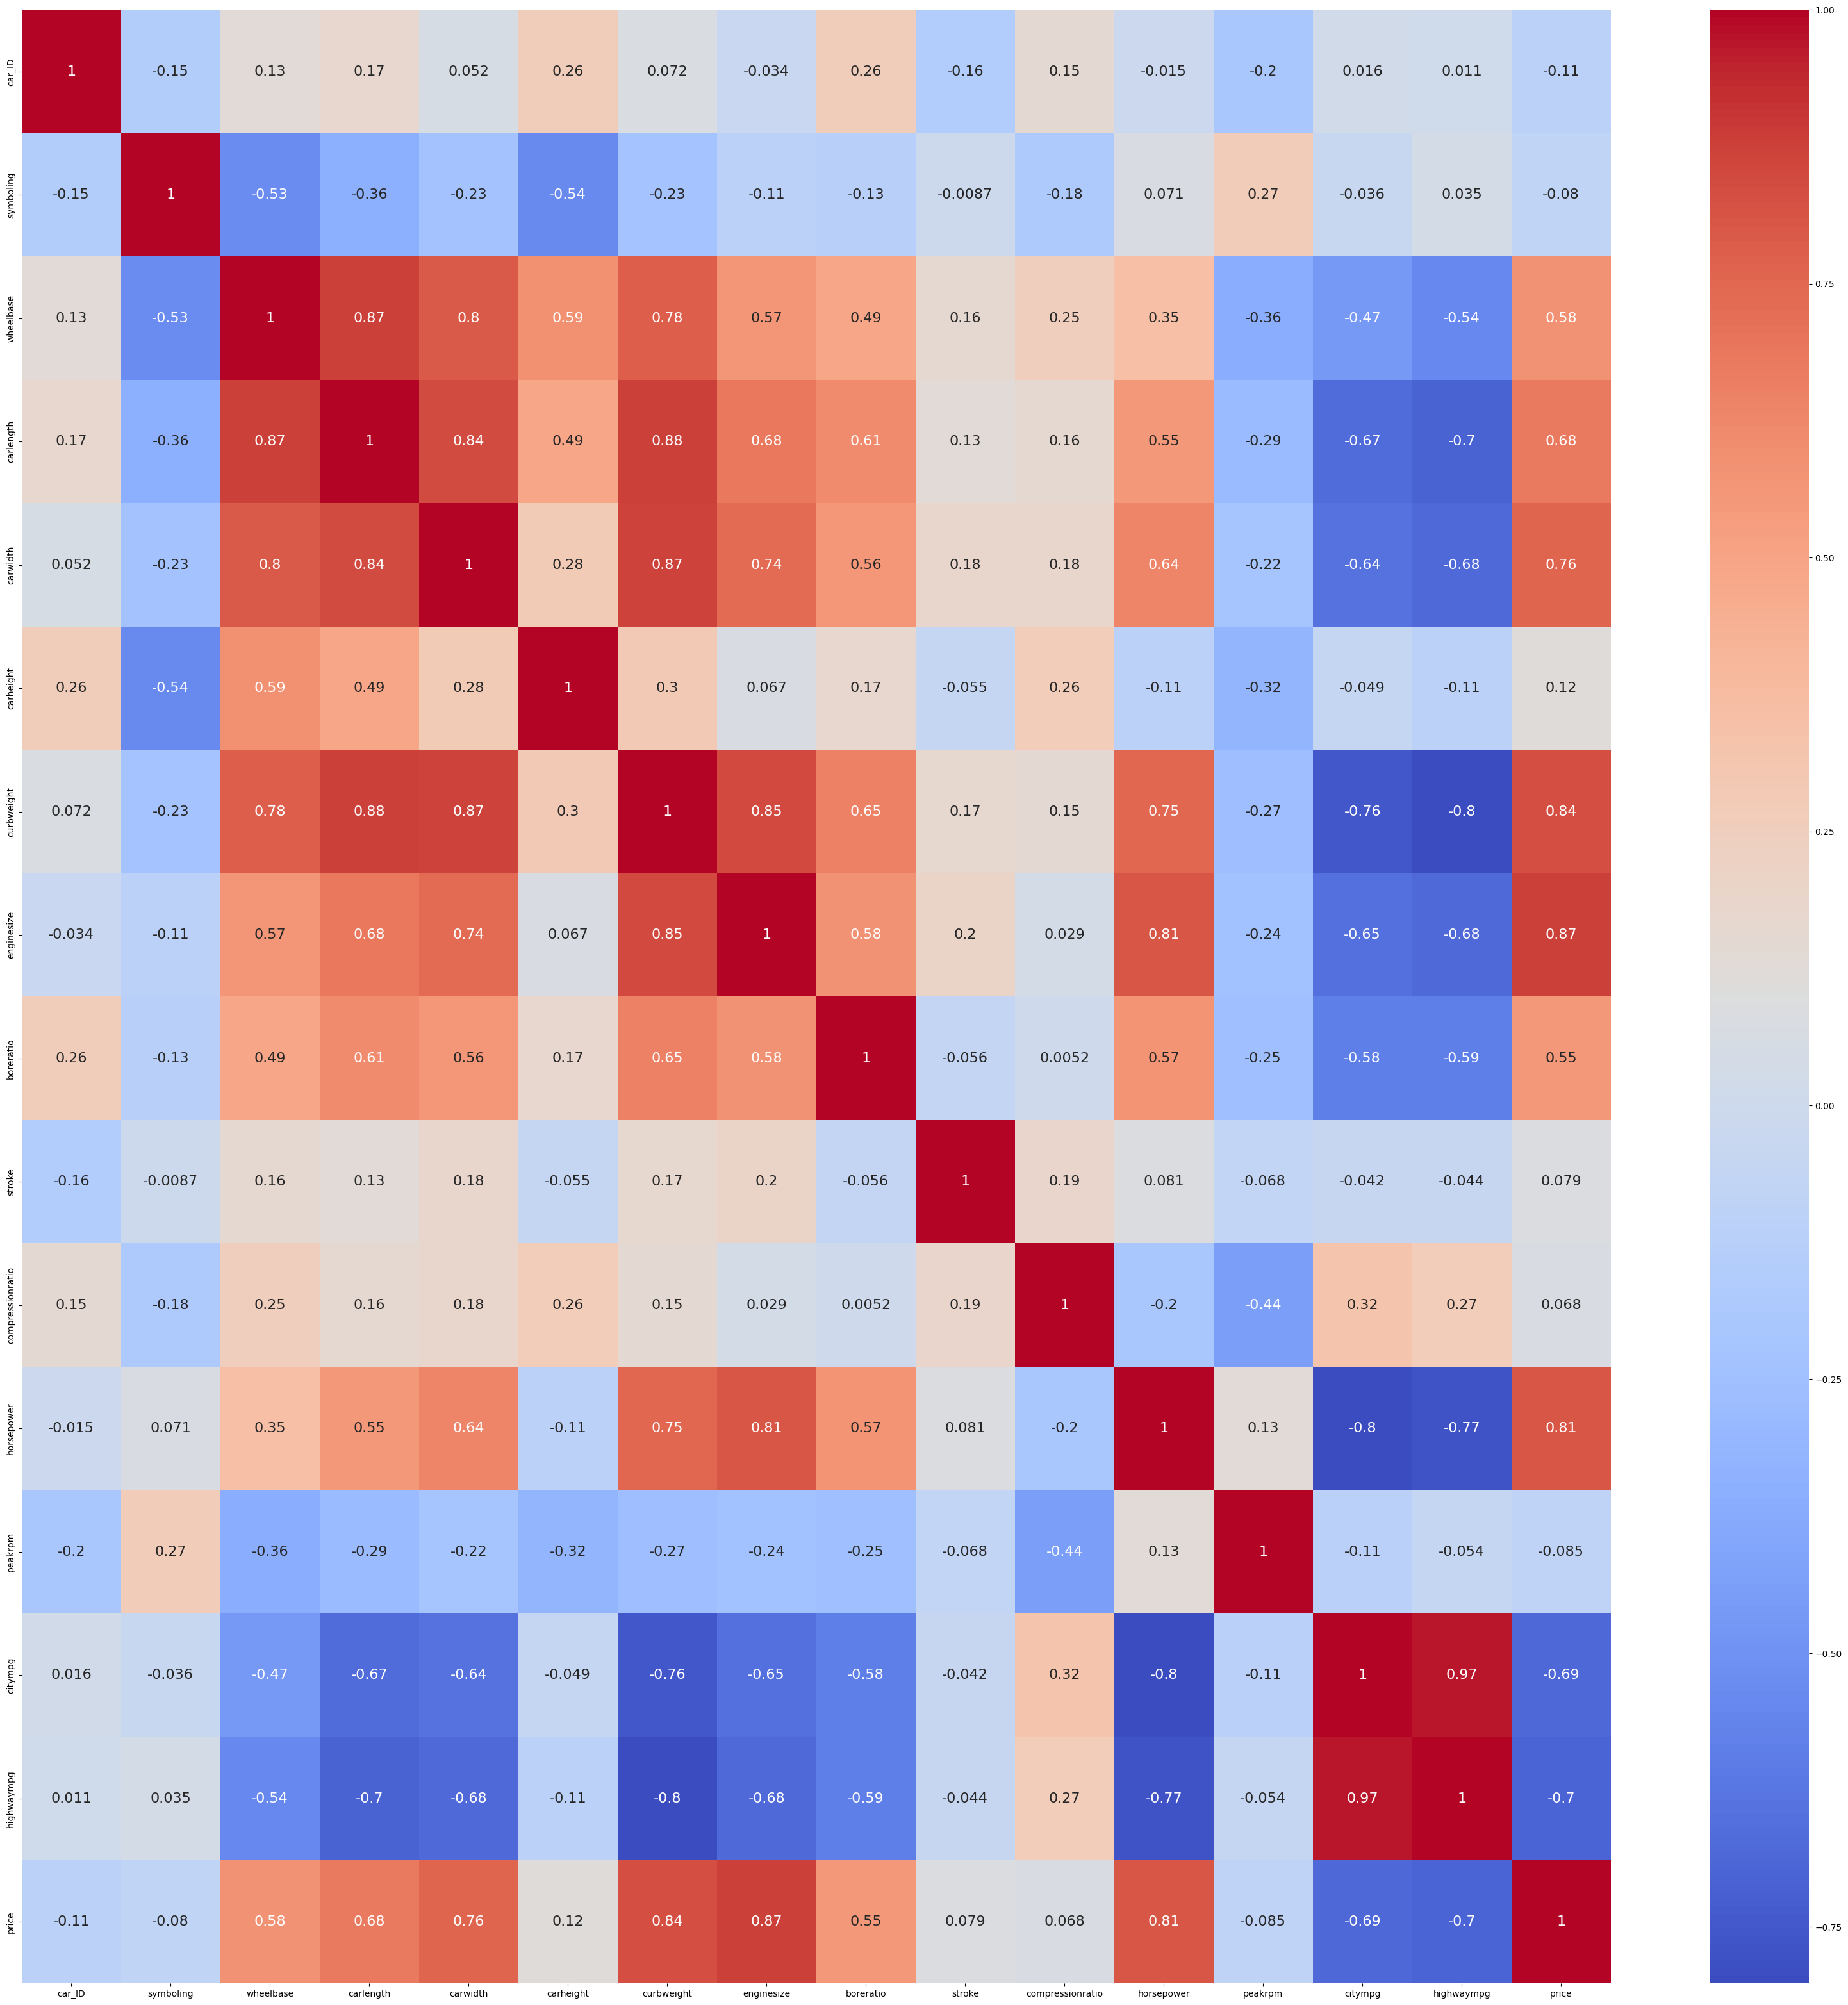

In [ ]:
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm',annot_kws={"size": 16})
plt.show()

In [ ]:
corr_matrix['price'].sort_values(ascending=False).to_frame()

,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
carlength,0.682920
wheelbase,0.577816
boreratio,0.553173
carheight,0.119336
stroke,0.079443


**List of all the useful Features**

List of all the useful Categorical Features.

* CompanyName
* Fuel Type
* Aspiration
* Door Number
* Car Body
* Drive Wheel
* Engine Type
* Cyclinder Number
* Fuel System

List of all he useful Numerical Features.

* Wheelbase
* Carlength
* Carwidth
* Curbeweight
* Enginesize
* Boreratio
* Horsepower
* citympg
* Highwaympg
* Price

# Feature Engineering

1. Deriving New Features From "Company Name" Feature

In [19]:
z = round(df.groupby(["CompanyName"])["price"].agg(["mean"]),2).T
z

CompanyName,Nissan,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
mean,5499.0,15498.33,17859.17,26118.75,33647.0,6007.0,7875.44,8184.69,8916.5,34600.0,...,10704.88,15489.09,7963.43,31400.5,9595.0,15223.33,8541.25,9885.81,10077.5,18063.18


In [ ]:
df = df.merge(z.T, how='left', on='CompanyName')
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,mean
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,15498.33
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,15498.33
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,15498.33
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,17859.17
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,17859.17


In [ ]:
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['CarsRange'] = pd.cut(df['mean'],bins,right=False,labels=cars_bin)
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,mean,CarsRange
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,15498.33,Medium
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,15498.33,Medium
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,15498.33,Medium
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950.0,audi,17859.17,Medium
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450.0,audi,17859.17,Medium


2. Creating new DataFrame with all the useful Features.

In [ ]:
new_df = df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'
             ,'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg',
             'price','CarsRange']]
new_df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,CarsRange
0,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,Medium
1,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,Medium
2,gas,std,two,hatchback,rwd,ohcv,six,mpfi,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,Medium
3,gas,std,four,sedan,fwd,ohc,four,mpfi,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,Medium
4,gas,std,four,sedan,4wd,ohc,five,mpfi,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,Medium


3. Split the dataframe into target variable and independent variables

In [ ]:
y = new_df[['price']]
x = new_df.drop(columns=['price'])

4. Creating Dummies Variables for all the Categorical Features

In [ ]:
x = pd.get_dummies(x,columns=x.select_dtypes(include=['object','category']).columns, drop_first=True, dtype='int64')

In [ ]:
x.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype_gas,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarsRange_Medium,CarsRange_Highend
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,1,...,0,0,0,0,0,1,0,0,1,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,1,...,0,0,0,0,0,1,0,0,1,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,1,...,0,0,0,0,0,1,0,0,1,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,1,...,0,0,0,0,0,1,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,1,...,0,0,0,0,0,1,0,0,1,0


6. Feature Scaling

In [ ]:
scale = StandardScaler()
x_sc = scale.fit_transform(x)

7. Splitting Data for Model Traning & Testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, random_state=42, test_size=0.2)

# Print the shape of the splits
print(f"Train features shape: {x_train.shape}")
print(f"Test features shape: {x_test.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

Train features shape: (164, 39)
Test features shape: (41, 39)
Train labels shape: (164, 1)
Test labels shape: (41, 1)


In [ ]:
x_train_sc = scale.fit_transform(x_train)
x_test_sc = scale.fit_transform(x_test)

# Model Building

1. Evaluation Functions

In [ ]:
def error_metrics(y_train_true, y_train_pred, y_test_true, y_test_pred):

    errors = {}

    # Errors for train data
    errors["Train_MAE"] = mean_absolute_error(y_train_true, y_train_pred)
    errors["Train_MSE"] = mean_squared_error(y_train_true, y_train_pred)
    errors["Train_RMSE"] = np.sqrt(errors["Train_MSE"])
    errors["Train_R2_Score"] = r2_score(y_train_true, y_train_pred)

    # Errors for test data
    errors["Test_MAE"] = mean_absolute_error(y_test_true, y_test_pred)
    errors["Test_MSE"] = mean_squared_error(y_test_true, y_test_pred)
    errors["Test_RMSE"] = np.sqrt(errors["Test_MSE"])
    errors["Test_R2_Score"] = r2_score(y_test_true, y_test_pred)

    return errors

model_evaluation = []

2. Linear Regression

In [ ]:
lr = LinearRegression()

lr.fit(x_train_sc, y_train)

y_train_pred = lr.predict(x_train_sc)
y_test_pred = lr.predict(x_test_sc)

# Retransform the target values
# y_train, y_test, y_train_pred, y_test_pred = log_transformer.inverse_transform(y_train), log_transformer.inverse_transform(y_test), log_transformer.inverse_transform(y_train_pred), log_transformer.inverse_transform(y_test_pred)


error_lr = error_metrics(y_train, y_train_pred, y_test, y_test_pred)
error_lr['Model Name']='Linear Regression'
error_lr

{'Train_MAE': 1153.1561608332995,
 'Train_MSE': 2362564.858418014,
 'Train_RMSE': 1537.0637131940932,
 'Train_R2_Score': 0.960384799952984,
 'Test_MAE': 2331.8775078114963,
 'Test_MSE': 11651401.045597848,
 'Test_RMSE': 3413.414865731654,
 'Test_R2_Score': 0.8524093285879212,
 'Model Name': 'Linear Regression'}

In [ ]:
mod_tree = DecisionTreeRegressor(random_state=42)

param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': np.arange(1,10),

}

grid_search = GridSearchCV(mod_tree, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best model
best_tree = grid_search.best_estimator_
print(best_tree)

DecisionTreeRegressor(max_depth=6, random_state=42)


In [ ]:
best_tree.fit(x_train, y_train)

y_train_pred = best_tree.predict(x_train)
y_test_pred = best_tree.predict(x_test)

error_tree = error_metrics(y_train, y_train_pred, y_test, y_test_pred)
error_tree['Model Name'] = 'Decision Tree'
error_tree

{'Train_MAE': 695.5433709188283,
 'Train_MSE': 1046332.3955119209,
 'Train_RMSE': 1022.903903361367,
 'Train_R2_Score': 0.9824552257195454,
 'Test_MAE': 1788.9256969286362,
 'Test_MSE': 7363975.00952321,
 'Test_RMSE': 2713.664498334901,
 'Test_R2_Score': 0.9067190278951098,
 'Model Name': 'Decision Tree'}

In [ ]:
random_forest = RandomForestRegressor(random_state=42, n_estimators=100, criterion='squared_error', max_depth=6)

# param_grid = {
#     'n_estimators': [100, 200, 300, 400],
#     'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
#     'max_depth': np.arange(1,20),
#     'min_samples_split': np.arange(1,10)
# }

# grid_search = GridSearchCV(random_forest, param_grid, cv=5)
random_forest.fit(x_train, y_train)

# Get the best model
# best_forest = grid_search.best_estimator_
# print(best_forest)

RandomForestRegressor(max_depth=6, random_state=42)

In [ ]:
y_train_pred = random_forest.predict(x_train)
y_test_pred = random_forest.predict(x_test)

error_random_forest = error_metrics(y_train, y_train_pred, y_test, y_test_pred)
error_random_forest['Model Name'] = 'Random Forest'
error_random_forest

{'Train_MAE': 807.6928109091461,
 'Train_MSE': 1302776.9353981267,
 'Train_RMSE': 1141.3925422036568,
 'Train_R2_Score': 0.978155194881298,
 'Test_MAE': 1420.6334648845104,
 'Test_MSE': 3857259.0856292145,
 'Test_RMSE': 1963.9906022252792,
 'Test_R2_Score': 0.9511393131151855,
 'Model Name': 'Random Forest'}

In [ ]:
model_evaluation = pd.concat([pd.DataFrame([error_lr]), pd.DataFrame([error_tree]), pd.DataFrame([error_random_forest])],
                             ignore_index=True)

model_evaluation

,Train_MAE,Train_MSE,Train_RMSE,Train_R2_Score,Test_MAE,Test_MSE,Test_RMSE,Test_R2_Score,Model Name
0,1153.156161,2.362565e+06,1537.063713,0.960385,2331.877508,1.165140e+07,3413.414866,0.852409,Linear Regression
1,695.543371,1.046332e+06,1022.903903,0.982455,1788.925697,7.363975e+06,2713.664498,0.906719,Decision Tree
2,807.692811,1.302777e+06,1141.392542,0.978155,1420.633465,3.857259e+06,1963.990602,0.951139,Random Forest


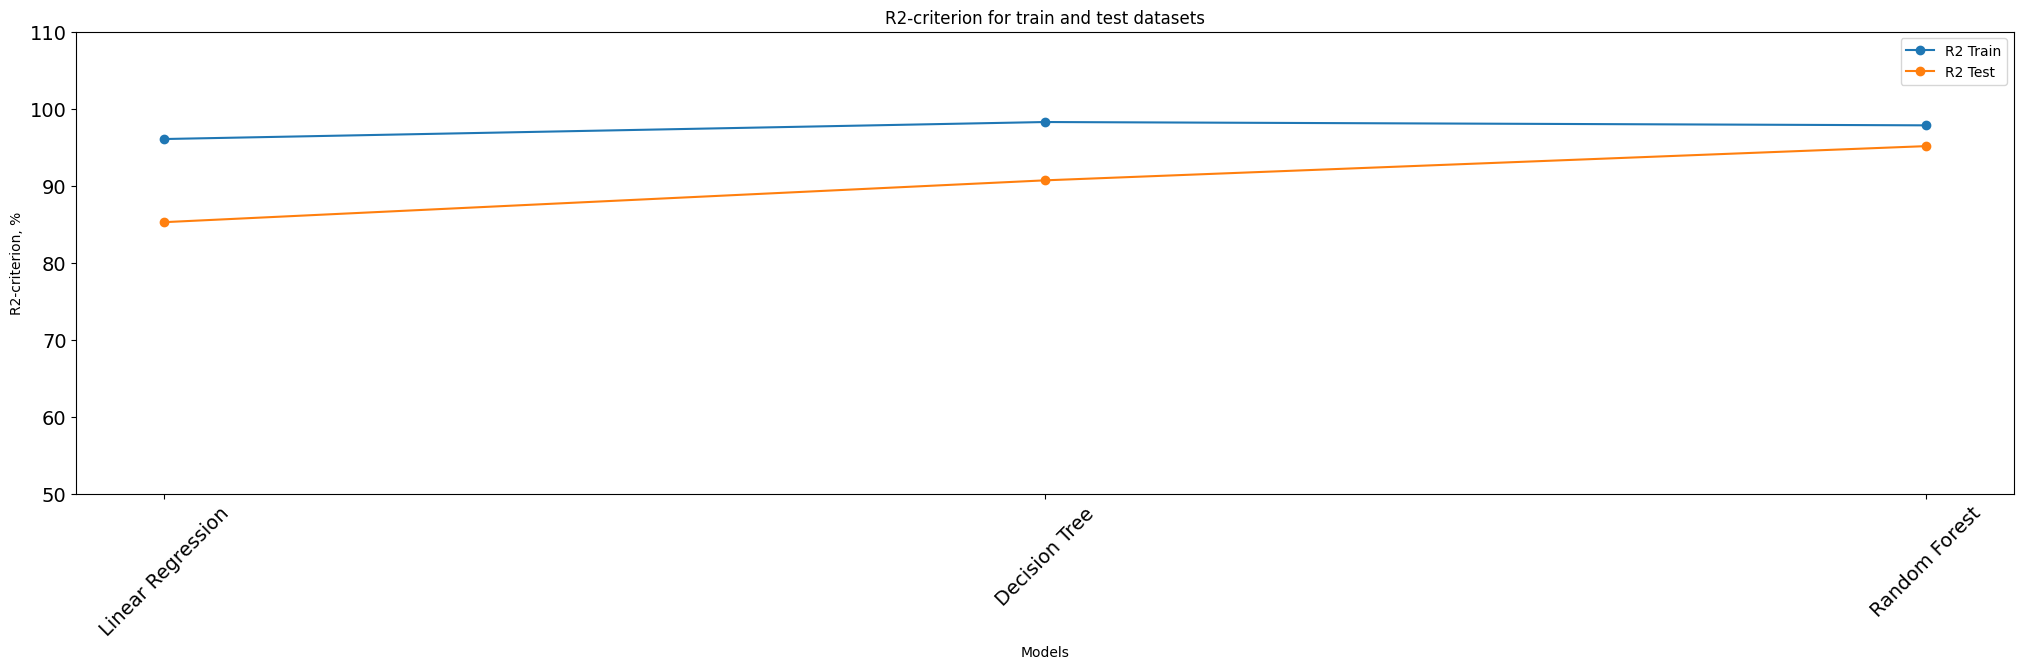

In [ ]:
plt.figure(figsize=[25,6])
# fig = px.line(model_evaluation, x=model_evaluation['Model Name'], y=model_evaluation['Train_R2_Score'], name='r2 score')
# sns.lineplot(data=model_evaluation, x=model_evaluation['Model Name'], y=model_evaluation['Train_R2_Score'])

plt.tick_params(labelsize=14)
plt.plot(model_evaluation['Model Name'], model_evaluation['Train_R2_Score']*100, label='R2 Train', marker='o')
plt.plot(model_evaluation['Model Name'], model_evaluation['Test_R2_Score']*100, label='R2 Test',  marker='o')
plt.legend()
plt.title('R2-criterion for train and test datasets')
plt.xlabel('Models')
plt.ylabel('R2-criterion, %')
plt.xticks(rotation=45)
plt.ylim(50, 110)
plt.show()

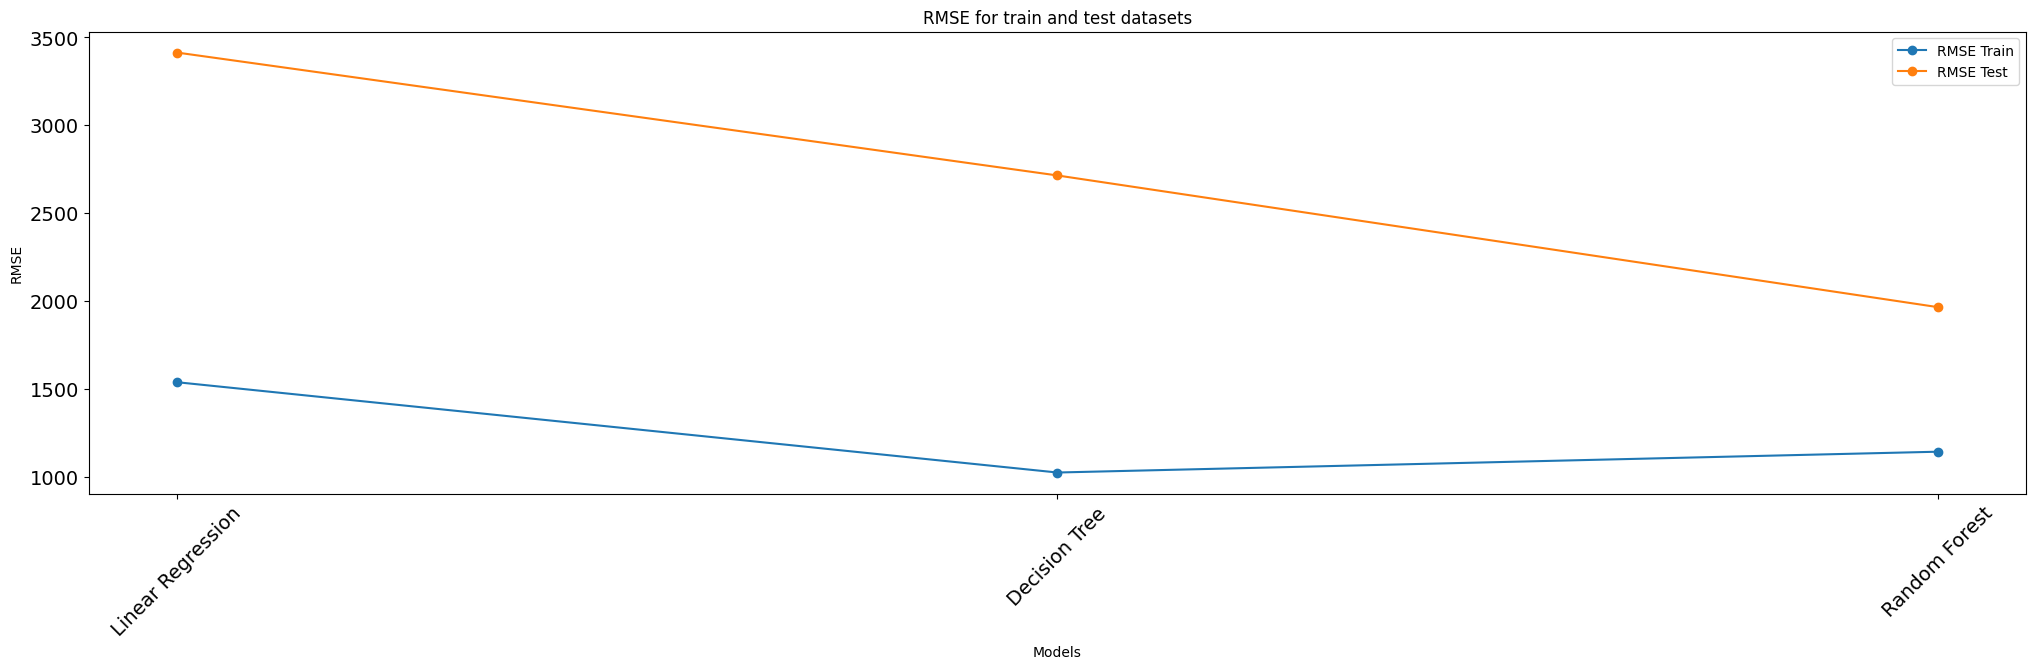

In [ ]:
plt.figure(figsize=[25,6])

plt.tick_params(labelsize=14)
plt.plot(model_evaluation['Model Name'], model_evaluation['Train_RMSE'], label='RMSE Train', marker='o')
plt.plot(model_evaluation['Model Name'], model_evaluation['Test_RMSE'], label='RMSE Test',marker='o')
plt.legend()
plt.title('RMSE for train and test datasets')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
# plt.ylim(50, 110)
plt.show()

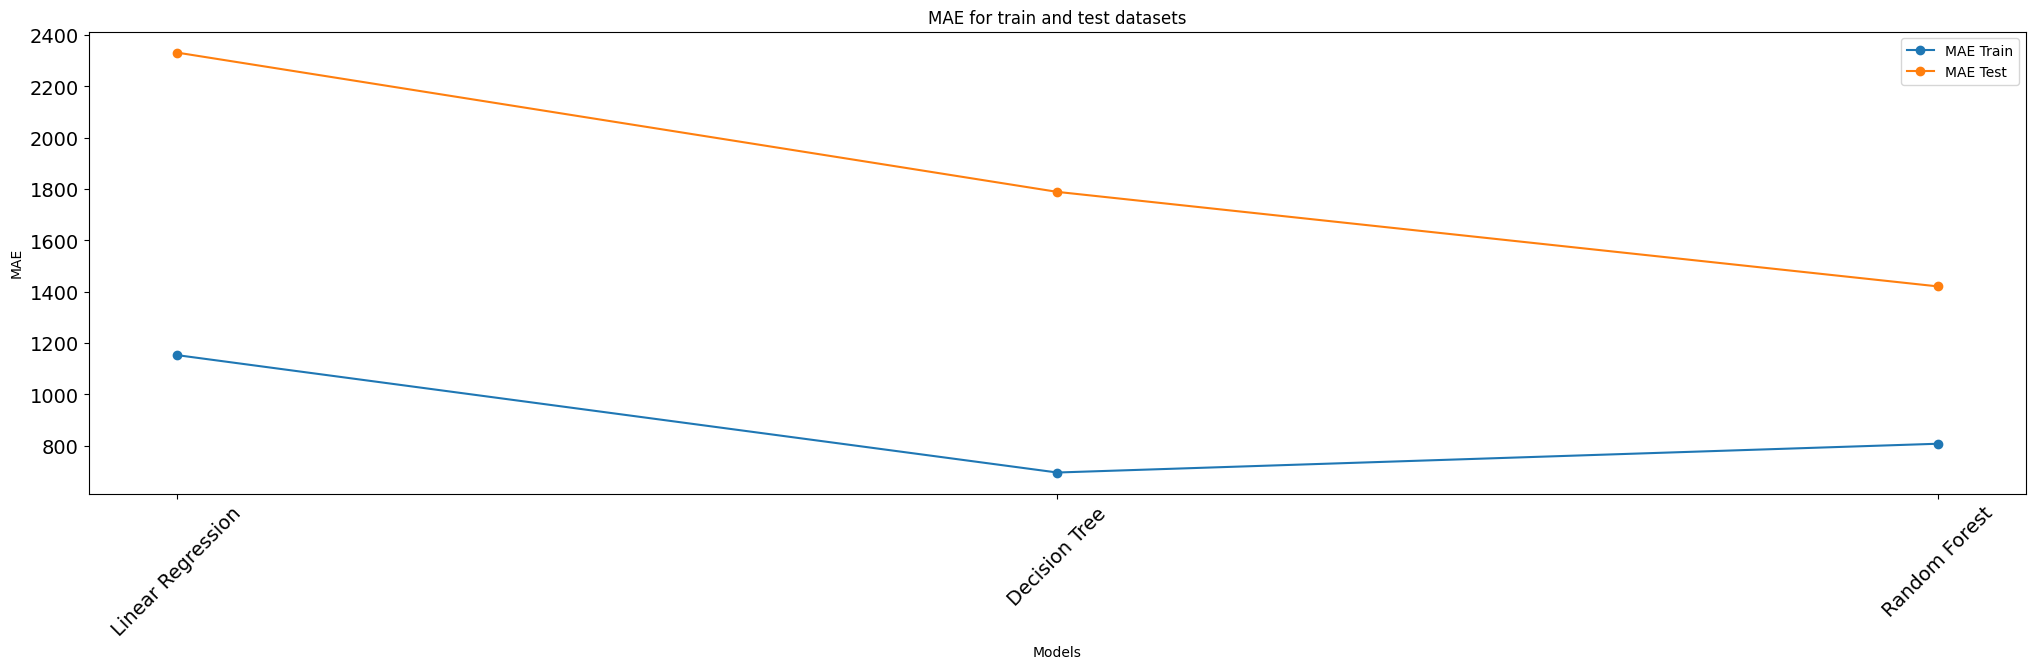

In [ ]:
plt.figure(figsize=[25,6])

plt.tick_params(labelsize=14)
plt.plot(model_evaluation['Model Name'], model_evaluation['Train_MAE'], label='MAE Train', marker='o')
plt.plot(model_evaluation['Model Name'], model_evaluation['Test_MAE'], label='MAE Test', marker='o')
plt.legend()
plt.title('MAE for train and test datasets')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.xticks(rotation=45)
# plt.ylim(50, 110)
plt.show()